In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)

# DATA SET DESCRIPTION



Employee attrition is a normal cycle in a company where employees decide to leave, such as retirement, resignation, personal health, new opportunities for advance career, not fit with company culture, and other similar reasons. Attrition seemed to be more voluntary and normal because the influences of attrition come from employee itself rather than company. Due to that, attrition always be compared to turnover, which also have similar things but seemed to be more negative.
However, there are some cons with attrition which cause some problem to the company.
- •	Reduction in size or strength of workforce
- •	Remaining job duties can increase the work load for remaining employees
- •	Losing an employee can lead to the loss of all this acquired knowledge, which is not easily replaceable. 
- •	Losing an employee can affect the smooth functioning of a team and lead to productivity losses.
- •	Losing potential employee
- •	Require not small cost for recruitment and training.

I have a dataset from unknown company. I want to look the employee’s characteristic which are doing attrition through the data and predict if the employee will leave the company from the model (I use gradient boosting classifier). The result is expected to give some advice for the company in order to get the employees stay and reduce attrition’s level.
The data is from Kaggle (https://www.kaggle.com/vjchoudhary7/hr-analytics-case-study)






#### Feature Description

In [2]:
description_data = pd.read_csv('data_dictionary.csv')
description_data

Variable  \
0                        Age   
1                  Attrition   
2             BusinessTravel   
3                 Department   
4           DistanceFromHome   
5                  Education   
6                        NaN   
7                        NaN   
8                        NaN   
9                        NaN   
10            EducationField   
11             EmployeeCount   
12            EmployeeNumber   
13   EnvironmentSatisfaction   
14                       NaN   
15                       NaN   
16                       NaN   
17                    Gender   
18            JobInvolvement   
19                       NaN   
20                       NaN   
21                       NaN   
22                  JobLevel   
23                   JobRole   
24           JobSatisfaction   
25                       NaN   
26                       NaN   
27                       NaN   
28             MaritalStatus   
29             MonthlyIncome   
30        NumCompaniesWorked   
31                    Over18   
32         PercentSalaryHike   
33         PerformanceRating   
34                       NaN   
35                       NaN   
36                       NaN   
37  RelationshipSatisfaction   
38                       NaN   
39                       NaN   
40                       NaN   
41             StandardHours   
42          StockOptionLevel   
43         TotalWorkingYears   
44     TrainingTimesLastYear   
45           WorkLifeBalance   
46                       NaN   
47                       NaN   
48                       NaN   
49            YearsAtCompany   
50   YearsSinceLastPromotion   
51      YearsWithCurrManager   

                                              Meaning             Levels  
0                                 Age of the employee                NaN  
1   Whether the employee left in the previous year...                NaN  
2   How frequently the employees travelled for bus...                NaN  
3                               Department in company                NaN  
4                           Distance from home in kms                NaN  
5                                     Education Level  1 'Below College'  
6                                                 NaN        2 'College'  
7                                                 NaN       3 'Bachelor'  
8                                                 NaN         4 'Master'  
9                                                 NaN         5 'Doctor'  
10                                 Field of education                NaN  
11                                     Employee count                NaN  
12                                 Employee number/id                NaN  
13                Work Environment Satisfaction Level            1 'Low'  
14                                                NaN         2 'Medium'  
15                                                NaN           3 'High'  
16                                                NaN      4 'Very High'  
17                                 Gender of employee                NaN  
18                              Job Involvement Level            1 'Low'  
19                                                NaN         2 'Medium'  
20                                                NaN           3 'High'  
21                                                NaN      4 'Very High'  
22          Job level at company on a scale of 1 to 5                NaN  
23                        Name of job role in company                NaN  
24                             Job Satisfaction Level            1 'Low'  
25                                                NaN         2 'Medium'  
26                                                NaN           3 'High'  
27                                                NaN      4 'Very High'  
28                     Marital status of the employee                NaN  
29                 Monthly income in rupees per month                NaN 

## Feature Description

- Age = Employee's age
---------------------
- Attrition = Attrition is target label of the dataset. It explain wheter employee left or stay in the previous year
----------------------------
- Business Travel = How frequently employees travelled for business purposes.
------------------------------------
- Department = Department where employees work
-------
- Distance From Home = How far the distance from home to the office in kilometers
--------
- Education = Level education of the employee
--------
- Education Filed = Field where employees used to study before
--------
- EmployeeCount = number of employee
--------
- Employee Number = Employee id. It's primary key of this dataset
-------
- Environment Satisfaction = It explains how good working condition of the company for employees to work. 
-------
- Gender = Employee's gender
--------
- Job Involvement = Evaluating how involve employee in a work.
--------
- Job Level = Job level at management structure
--------
- Job Role = Employee's function in the company that associate with the responsibilities of the role.
-------
- Job Satisfaction = Job Satisfaction explains how satisfied employees withtheir job. It's often relate with motivation theory (Herzberg motivation theory or Marslow motivation theory), such as salary, training given by the company for self development, recognizition, etc.
-----------
- Marital Status= Status of the employees, wheter emlpoyee single, already married, or divorced
-----------
- Monthly Income = Total employee income per month
----------
- NumCompaniesWorked = Numbers of companies that employees worked before.
-------------
- PercentSalaryHike = Percentage of increasing employee's salary from the previous year
-------------
- PerformanceRating = Work performance evaluation score given by employeer to the employees 
--------
- StandardHours = Standard working hours
--------
- StockOptionLevel = It gives employee to have stock of the company with certain price
-------
- TotalWorkingYears = How long employees have been work for all of their life in years
-------
- TrainingTimesLastYear = How many times employee get training from the company
-----
- WorkLifeBalance = It evaluates how employees balance their working life and their personal life by working on the company. Often, low work life balance in a company can make employee stressfull.

------
- YearsAtCompany = It shows how long the employees have been worked in the company
-----
- YearsSinceLastPromotion =  how long the employees have been worked with current position
-----
- YearsWithCurrManager = how long the employees have been worked with the current manager



--------------
##### NOTE:
- Job Satisfaction, Work life balance, environment satisfaction score are evaluation from employees to the company
- Performance rating are evaluation from employeer to employees
- Others are employee's personal data

## DATA PRE PROCESSING

In [3]:
data1 = pd.read_csv('general_data.csv')
data2 = pd.read_csv('manager_survey_data.csv')
data3 = pd.read_csv('employee_survey_data.csv')

In [4]:
data1

Age Attrition     BusinessTravel              Department  \
0      51        No      Travel_Rarely                   Sales   
1      31       Yes  Travel_Frequently  Research & Development   
2      32        No  Travel_Frequently  Research & Development   
3      38        No         Non-Travel  Research & Development   
4      32        No      Travel_Rarely  Research & Development   
...   ...       ...                ...                     ...   
4405   42        No      Travel_Rarely  Research & Development   
4406   29        No      Travel_Rarely  Research & Development   
4407   25        No      Travel_Rarely  Research & Development   
4408   42        No      Travel_Rarely                   Sales   
4409   40        No      Travel_Rarely  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  EmployeeID  \
0                    6          2  Life Sciences              1           1   
1                   10          1  Life Sciences              1           2   
2                   17          4          Other              1           3   
3                    2          5  Life Sciences              1           4   
4                   10          1        Medical              1           5   
...                ...        ...            ...            ...         ...   
4405                 5          4        Medical              1        4406   
4406                 2          4        Medical              1        4407   
4407                25          2  Life Sciences              1        4408   
4408                18          2        Medical              1        4409   
4409                28          3        Medical              1        4410   

      Gender  JobLevel                    JobRole MaritalStatus  \
0     Female         1  Healthcare Representative       Married   
1     Female         1         Research Scientist        Single   
2       Male         4            Sales Executive       Married   
3       Male         3            Human Resources       Married   
4       Male         1            Sales Executive        Single   
...      ...       ...                        ...           ...   
4405  Female         1         Research Scientist        Single   
4406    Male         1      Laboratory Technician      Divorced   
4407    Male         2            Sales Executive       Married   
4408    Male         1      Laboratory Technician      Divorced   
4409    Male         2      Laboratory Technician      Divorced   

      MonthlyIncome  NumCompaniesWorked Over18  PercentSalaryHike  \
0            131160                 1.0      Y                 11   
1             41890                 0.0      Y                 23   
2            193280                 1.0      Y                 15   
3             83210                 3.0      Y                 11   
4             23420                 4.0      Y                 12   
...             ...                 ...    ...                ...   
4405          60290                 3.0      Y                 17   
4406          26790                 2.0      Y                 15   
4407          37020                 0.0      Y                 20   
4408          23980                 0.0      Y                 14   
4409          54680                 0.0      Y                 12   

      StandardHours  StockOptionLevel  TotalWorkingYears  \
0                 8                 0                1.0   
1                 8                 1                6.0   
2                 8                 3                5.0   
3                 8                 3               13.0   
4                 8                 2                9.0   
...             ...               ...                ...   
4405              8                 1               10.0   
4406              8                 0               10.0   
4407              8                 0                5.0   
4408              8           

In [5]:
data2

EmployeeID  JobInvolvement  PerformanceRating
0              1               3                  3
1              2               2                  4
2              3               3                  3
3              4               2                  3
4              5               3                  3
...          ...             ...                ...
4405        4406               3                  3
4406        4407               2                  3
4407        4408               3                  4
4408        4409               2                  3
4409        4410               4                  3

[4410 rows x 3 columns]

In [6]:
data3

EmployeeID  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance
0              1                      3.0              4.0              2.0
1              2                      3.0              2.0              4.0
2              3                      2.0              2.0              1.0
3              4                      4.0              4.0              3.0
4              5                      4.0              1.0              3.0
...          ...                      ...              ...              ...
4405        4406                      4.0              1.0              3.0
4406        4407                      4.0              4.0              3.0
4407        4408                      1.0              3.0              3.0
4408        4409                      4.0              1.0              3.0
4409        4410                      1.0              3.0              NaN

[4410 rows x 4 columns]

#### combining all data from separates files by using EmployeeID as primary key

In [7]:
employee_data = pd.merge(data1, data2, on='EmployeeID')

In [8]:
employee_data = pd.merge(employee_data, data3, on='EmployeeID')

In [9]:
employee_data

Age Attrition     BusinessTravel              Department  \
0      51        No      Travel_Rarely                   Sales   
1      31       Yes  Travel_Frequently  Research & Development   
2      32        No  Travel_Frequently  Research & Development   
3      38        No         Non-Travel  Research & Development   
4      32        No      Travel_Rarely  Research & Development   
...   ...       ...                ...                     ...   
4405   42        No      Travel_Rarely  Research & Development   
4406   29        No      Travel_Rarely  Research & Development   
4407   25        No      Travel_Rarely  Research & Development   
4408   42        No      Travel_Rarely                   Sales   
4409   40        No      Travel_Rarely  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  EmployeeID  \
0                    6          2  Life Sciences              1           1   
1                   10          1  Life Sciences              1           2   
2                   17          4          Other              1           3   
3                    2          5  Life Sciences              1           4   
4                   10          1        Medical              1           5   
...                ...        ...            ...            ...         ...   
4405                 5          4        Medical              1        4406   
4406                 2          4        Medical              1        4407   
4407                25          2  Life Sciences              1        4408   
4408                18          2        Medical              1        4409   
4409                28          3        Medical              1        4410   

      Gender  JobLevel                    JobRole MaritalStatus  \
0     Female         1  Healthcare Representative       Married   
1     Female         1         Research Scientist        Single   
2       Male         4            Sales Executive       Married   
3       Male         3            Human Resources       Married   
4       Male         1            Sales Executive        Single   
...      ...       ...                        ...           ...   
4405  Female         1         Research Scientist        Single   
4406    Male         1      Laboratory Technician      Divorced   
4407    Male         2            Sales Executive       Married   
4408    Male         1      Laboratory Technician      Divorced   
4409    Male         2      Laboratory Technician      Divorced   

      MonthlyIncome  NumCompaniesWorked Over18  PercentSalaryHike  \
0            131160                 1.0      Y                 11   
1             41890                 0.0      Y                 23   
2            193280                 1.0      Y                 15   
3             83210                 3.0      Y                 11   
4             23420                 4.0      Y                 12   
...             ...                 ...    ...                ...   
4405          60290                 3.0      Y                 17   
4406          26790                 2.0      Y                 15   
4407          37020                 0.0      Y                 20   
4408          23980                 0.0      Y                 14   
4409          54680                 0.0      Y                 12   

      StandardHours  StockOptionLevel  TotalWorkingYears  \
0                 8                 0                1.0   
1                 8                 1                6.0   
2                 8                 3                5.0   
3                 8                 3               13.0   
4                 8                 2                9.0   
...             ...               ...                ...   
4405              8                 1               10.0   
4406              8                 0               10.0   
4407              8                 0                5.0   
4408              8           

In [10]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

Chech if there is any duplicate data. Fortunately, there is no duplicate data

In [11]:
# check duplicates data

duplicates = employee_data.duplicated()
duplicates


0       False
1       False
2       False
3       False
4       False
        ...  
4405    False
4406    False
4407    False
4408    False
4409    False
Length: 4410, dtype: bool

In [12]:
employee_data[duplicates]

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeID, Gender, JobLevel, JobRole, MaritalStatus, MonthlyIncome, NumCompaniesWorked, Over18, PercentSalaryHike, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsSinceLastPromotion, YearsWithCurrManager, JobInvolvement, PerformanceRating, EnvironmentSatisfaction, JobSatisfaction, WorkLifeBalance]
Index: []

- There is no duplicated data

In [13]:
employee_data.describe()

Age  DistanceFromHome    Education  EmployeeCount   EmployeeID  \
count  4410.000000       4410.000000  4410.000000         4410.0  4410.000000   
mean     36.923810          9.192517     2.912925            1.0  2205.500000   
std       9.133301          8.105026     1.023933            0.0  1273.201673   
min      18.000000          1.000000     1.000000            1.0     1.000000   
25%      30.000000          2.000000     2.000000            1.0  1103.250000   
50%      36.000000          7.000000     3.000000            1.0  2205.500000   
75%      43.000000         14.000000     4.000000            1.0  3307.750000   
max      60.000000         29.000000     5.000000            1.0  4410.000000   

          JobLevel  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
count  4410.000000    4410.000000         4391.000000        4410.000000   
mean      2.063946   65029.312925            2.694830          15.209524   
std       1.106689   47068.888559            2.498887           3.659108   
min       1.000000   10090.000000            0.000000          11.000000   
25%       1.000000   29110.000000            1.000000          12.000000   
50%       2.000000   49190.000000            2.000000          14.000000   
75%       3.000000   83800.000000            4.000000          18.000000   
max       5.000000  199990.000000            9.000000          25.000000   

       StandardHours  StockOptionLevel  TotalWorkingYears  \
count         4410.0       4410.000000        4401.000000   
mean             8.0          0.793878          11.279936   
std              0.0          0.851883           7.782222   
min              8.0          0.000000           0.000000   
25%              8.0          0.000000           6.000000   
50%              8.0          1.000000          10.000000   
75%              8.0          1.000000          15.000000   
max              8.0          3.000000          40.000000   

       TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
count            4410.000000     4410.000000              4410.000000   
mean                2.799320        7.008163                 2.187755   
std                 1.288978        6.125135                 3.221699   
min                 0.000000        0.000000                 0.000000   
25%                 2.000000        3.000000                 0.000000   
50%                 3.000000        5.000000                 1.000000   
75%                 3.000000        9.000000                 3.000000   
max                 6.000000       40.000000                15.000000   

       YearsWithCurrManager  JobInvolvement  PerformanceRating  \
count           4410.000000     4410.000000        4410.000000   
mean               4.123129        2.729932           3.153741   
std                3.567327        0.711400           0.360742   
min                0.000000        1.000000           3.000000   
25%                2.000000        2.000000           3.000000   
50%                3.000000        3.000000           3.000000   
75%                7.000000        3.000000           3.000000   
max               17.000000        4.000000           4.000000   

       EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  
count              4385.000000      4390.000000      4372.000000  
mean                  2.723603         2.728246         2.761436  
std                   1.092756         1.101253         0.706245  
min                   1.000000         1.000000         1.000000  
25%                   2.000000         2.000000         2.000000  
50%                   3.000000         3.000000         3.000000  
75%                   4.000000         4.000000         3.000000  
max                   4.000000         4.000000         4.000000

In [14]:
#Checking Unique Value and find if there is any inconsistent data
for i in employee_data.columns :
    print(i)
    print(employee_data[i].unique())
    print()

Age
[51 31 32 38 46 28 29 25 45 36 55 47 37 21 35 26 50 53 42 44 49 18 41 39
 58 33 43 52 27 30 54 40 23 48 57 34 24 22 56 60 19 20 59]

Attrition
['No' 'Yes']

BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Department
['Sales' 'Research & Development' 'Human Resources']

DistanceFromHome
[ 6 10 17  2  8 11 18  1  7 28 14  3  4 16  9  5 20 29 15 13 24 19 22 25
 21 26 27 12 23]

Education
[2 1 4 5 3]

EducationField
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

EmployeeCount
[1]

EmployeeID
[   1    2    3 ... 4408 4409 4410]

Gender
['Female' 'Male']

JobLevel
[1 4 3 2 5]

JobRole
['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']

MaritalStatus
['Married' 'Single' 'Divorced']

MonthlyIncome
[131160  41890 193280 ...  37020  23980  54680]

NumCompaniesWorked
[ 1.  0.  3.  4.  2.  7.  9.  

- Checking unique values per variable if there is any inconsistent data
- There is no inconsistent data value so we don't have to fix anything

# EXPLORATORY  DATA ANALYSIS

In [15]:
employee_data

Age Attrition     BusinessTravel              Department  \
0      51        No      Travel_Rarely                   Sales   
1      31       Yes  Travel_Frequently  Research & Development   
2      32        No  Travel_Frequently  Research & Development   
3      38        No         Non-Travel  Research & Development   
4      32        No      Travel_Rarely  Research & Development   
...   ...       ...                ...                     ...   
4405   42        No      Travel_Rarely  Research & Development   
4406   29        No      Travel_Rarely  Research & Development   
4407   25        No      Travel_Rarely  Research & Development   
4408   42        No      Travel_Rarely                   Sales   
4409   40        No      Travel_Rarely  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  EmployeeID  \
0                    6          2  Life Sciences              1           1   
1                   10          1  Life Sciences              1           2   
2                   17          4          Other              1           3   
3                    2          5  Life Sciences              1           4   
4                   10          1        Medical              1           5   
...                ...        ...            ...            ...         ...   
4405                 5          4        Medical              1        4406   
4406                 2          4        Medical              1        4407   
4407                25          2  Life Sciences              1        4408   
4408                18          2        Medical              1        4409   
4409                28          3        Medical              1        4410   

      Gender  JobLevel                    JobRole MaritalStatus  \
0     Female         1  Healthcare Representative       Married   
1     Female         1         Research Scientist        Single   
2       Male         4            Sales Executive       Married   
3       Male         3            Human Resources       Married   
4       Male         1            Sales Executive        Single   
...      ...       ...                        ...           ...   
4405  Female         1         Research Scientist        Single   
4406    Male         1      Laboratory Technician      Divorced   
4407    Male         2            Sales Executive       Married   
4408    Male         1      Laboratory Technician      Divorced   
4409    Male         2      Laboratory Technician      Divorced   

      MonthlyIncome  NumCompaniesWorked Over18  PercentSalaryHike  \
0            131160                 1.0      Y                 11   
1             41890                 0.0      Y                 23   
2            193280                 1.0      Y                 15   
3             83210                 3.0      Y                 11   
4             23420                 4.0      Y                 12   
...             ...                 ...    ...                ...   
4405          60290                 3.0      Y                 17   
4406          26790                 2.0      Y                 15   
4407          37020                 0.0      Y                 20   
4408          23980                 0.0      Y                 14   
4409          54680                 0.0      Y                 12   

      StandardHours  StockOptionLevel  TotalWorkingYears  \
0                 8                 0                1.0   
1                 8                 1                6.0   
2                 8                 3                5.0   
3                 8                 3               13.0   
4                 8                 2                9.0   
...             ...               ...                ...   
4405              8                 1               10.0   
4406              8                 0               10.0   
4407              8                 0                5.0   
4408              8           

Text(0, 0.5, 'Number')

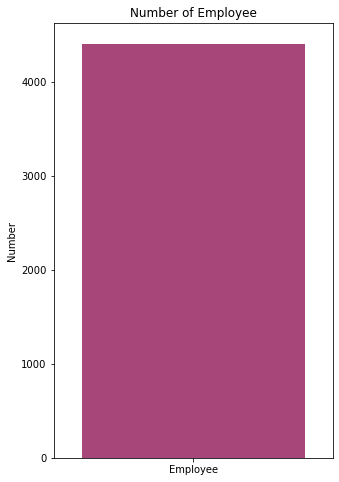

In [16]:
plt.figure(figsize=(5,8))
sns.barplot(x=['Employee'], y=len(employee_data),errwidth=0.5, palette='magma')
plt.title('Number of Employee')
plt.ylabel('Number')

- There are 4410 employees in dataset

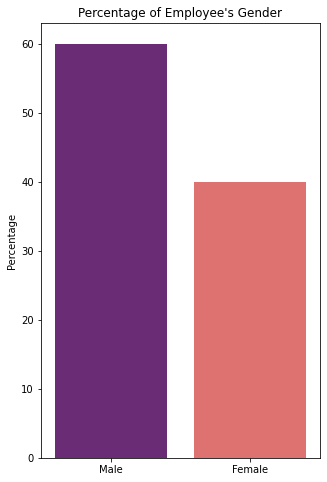

In [17]:
gender = employee_data['Gender'].value_counts()/employee_data['Gender'].value_counts().sum()*100
gender = pd.DataFrame(gender)
plt.figure(figsize=(5,8))
ax = sns.barplot(x=gender.index, y=gender['Gender'], palette='magma')
plt.title("Percentage of Employee's Gender")
plt.ylabel('Percentage')
plt.show()

- There are 60% male employees, and 40% female employees

In [18]:
employee_data['Education'] = employee_data['Education'].replace({1:'Below College', 2:'College', 3:'Bachelor', 4:'Master', 5:'Doctor'})

Text(0.5, 1.0, "Percentage of Employee's Education Stage")

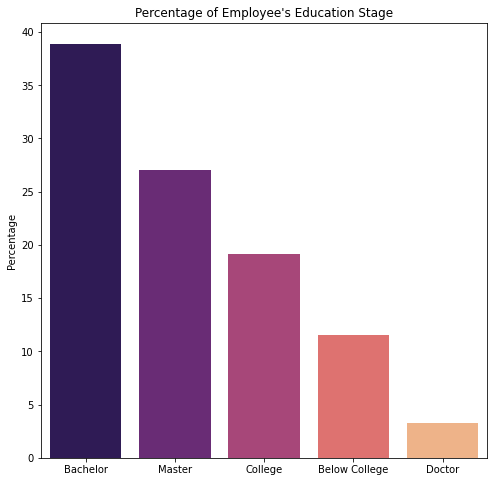

In [19]:
education = employee_data['Education'].value_counts()/employee_data['Education'].value_counts().sum()*100
education = pd.DataFrame(education)
education
plt.figure(figsize=(8,8))
sns.barplot(x=education.index, y=education['Education'], palette='magma')
plt.ylabel('Percentage')
plt.title("Percentage of Employee's Education Stage")

Most of the employees, almost 40% from the total employees, are bachelor degree. It followed by employee which graduate with master degree with 27%, college degree with 19.11%, below college with 11.5% . The rest are employees with doctor degree with 3.26%

In [20]:
education

Education
Bachelor       38.911565
Master         27.074830
College        19.183673
Below College  11.564626
Doctor          3.265306

In [21]:
employee_data

Age Attrition     BusinessTravel              Department  \
0      51        No      Travel_Rarely                   Sales   
1      31       Yes  Travel_Frequently  Research & Development   
2      32        No  Travel_Frequently  Research & Development   
3      38        No         Non-Travel  Research & Development   
4      32        No      Travel_Rarely  Research & Development   
...   ...       ...                ...                     ...   
4405   42        No      Travel_Rarely  Research & Development   
4406   29        No      Travel_Rarely  Research & Development   
4407   25        No      Travel_Rarely  Research & Development   
4408   42        No      Travel_Rarely                   Sales   
4409   40        No      Travel_Rarely  Research & Development   

      DistanceFromHome      Education EducationField  EmployeeCount  \
0                    6        College  Life Sciences              1   
1                   10  Below College  Life Sciences              1   
2                   17         Master          Other              1   
3                    2         Doctor  Life Sciences              1   
4                   10  Below College        Medical              1   
...                ...            ...            ...            ...   
4405                 5         Master        Medical              1   
4406                 2         Master        Medical              1   
4407                25        College  Life Sciences              1   
4408                18        College        Medical              1   
4409                28       Bachelor        Medical              1   

      EmployeeID  Gender  JobLevel                    JobRole MaritalStatus  \
0              1  Female         1  Healthcare Representative       Married   
1              2  Female         1         Research Scientist        Single   
2              3    Male         4            Sales Executive       Married   
3              4    Male         3            Human Resources       Married   
4              5    Male         1            Sales Executive        Single   
...          ...     ...       ...                        ...           ...   
4405        4406  Female         1         Research Scientist        Single   
4406        4407    Male         1      Laboratory Technician      Divorced   
4407        4408    Male         2            Sales Executive       Married   
4408        4409    Male         1      Laboratory Technician      Divorced   
4409        4410    Male         2      Laboratory Technician      Divorced   

      MonthlyIncome  NumCompaniesWorked Over18  PercentSalaryHike  \
0            131160                 1.0      Y                 11   
1             41890                 0.0      Y                 23   
2            193280                 1.0      Y                 15   
3             83210                 3.0      Y                 11   
4             23420                 4.0      Y                 12   
...             ...                 ...    ...                ...   
4405          60290                 3.0      Y                 17   
4406          26790                 2.0      Y                 15   
4407          37020                 0.0      Y                 20   
4408          23980                 0.0      Y                 14   
4409          54680                 0.0      Y                 12   

      StandardHours  StockOptionLevel  TotalWorkingYears  \
0                 8                 0                1.0   
1                 8                 1                6.0   
2                 8                 3                5.0   
3                 8                 3               13.0   
4                 8                 2                9.0   
...             ...               ...                ...   
4405              8                 1               10.0   
4406              8                 0               10.0   
4407              8                 0     

Text(0.5, 1.0, "Percentage of Employee's Education Field")

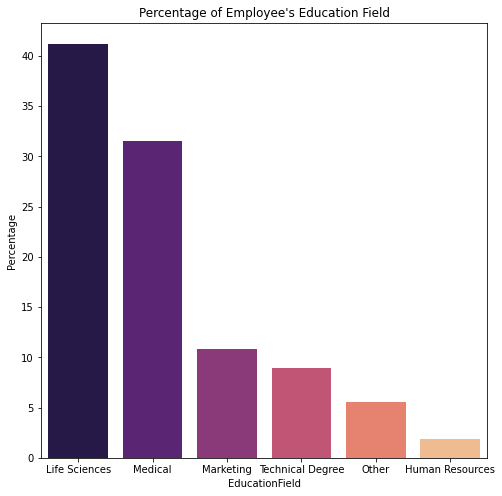

In [22]:
education_field = employee_data['EducationField'].value_counts()/employee_data['EducationField'].value_counts().sum() * 100
education_field = pd.DataFrame([education_field.index, education_field.values], index=['EducationField','EduPercentage']).T
education_field

plt.figure(figsize=(8,8))
sns.barplot(x=education_field['EducationField'], y=education_field['EduPercentage'], palette='magma')
plt.ylabel('Percentage')
plt.title("Percentage of Employee's Education Field")

Majority are graduated from Life Sciences field with around 41.2% and medical field with over 31.5%.
The rest are graduated from marketing field with 10.8%, technical degree with 8.9%, Human resources with 1.8% and Other with 5.5%. We can see the core employees needed for the company is someone which is graduated from Life Sciences and Medical field

In [23]:
education_field

EducationField EduPercentage
0     Life Sciences       41.2245
1           Medical       31.5646
2         Marketing       10.8163
3  Technical Degree       8.97959
4             Other       5.57823
5   Human Resources       1.83673

In [24]:
department = employee_data['Department'].value_counts()/employee_data['Department'].value_counts().sum() * 100
department = pd.DataFrame([department.keys(),department.values], index=['Department','DeptPercentage']).T
department

Department DeptPercentage
0  Research & Development        65.3741
1                   Sales        30.3401
2         Human Resources        4.28571

In [25]:
import plotly.express as px
fig = px.pie(department, values='DeptPercentage', names='Department', title="Employee's Department Percentage" )
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

- There are three departments in the company. First, Research & Development Department which is the core department of the company have 65.4% from the total employees.
- Second lead is Sales department with 30.3% of total employees.
- Human resources department has the least employees with 4.29%

In [26]:
marital = employee_data['MaritalStatus'].value_counts()/employee_data['MaritalStatus'].value_counts().sum() * 100
marital = pd.DataFrame([marital.keys(),marital.values], index=['MStats','MaritalPct']).T
marital


MStats MaritalPct
0   Married    45.7823
1    Single    31.9728
2  Divorced    22.2449

In [27]:
fig = px.pie(marital, values='MaritalPct', names='MStats', title="Employee's Marital Status Percentage" )
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

We find that 45.8% of the employees are married, 22.2% divorce, and 32% single

In [28]:
male_marital = round((employee_data[employee_data['Gender']== 'Male']['MaritalStatus'].value_counts()/employee_data[employee_data['Gender']== 'Male']['MaritalStatus'].value_counts().sum() *100),2)
female_marital = round((employee_data[employee_data['Gender']== 'Female']['MaritalStatus'].value_counts()/employee_data[employee_data['Gender']== 'Female']['MaritalStatus'].value_counts().sum() *100),2)

In [29]:
marital_gender = {'Male' : male_marital, 'Female': female_marital}
marital_gender = pd.DataFrame(marital_gender).T
# marital_gender.rename(columns={'index':'MaritalStats'}, inplace=True)
marital_gender

Married  Single  Divorced
Male      44.33   32.43     23.24
Female    47.96   31.29     20.75

Text(0.5, 1.0, 'Percentage of Marital Status Base on Gender')

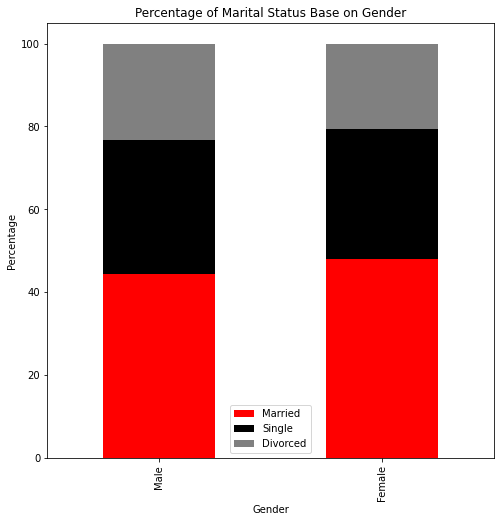

In [30]:
marital_gender.plot(kind='bar', stacked=True, color=['red','black','grey'], figsize=(8,8))
plt.ylabel('Percentage')
plt.xlabel('Gender')
plt.title('Percentage of Marital Status Base on Gender')

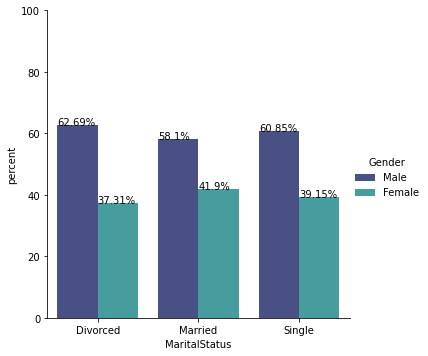

In [31]:
# Comparasion between gender
a = employee_data.groupby('MaritalStatus')['Gender'].value_counts(normalize=True)*100
a = a.rename('percent').reset_index()
a

g = sns.catplot(x='MaritalStatus',y='percent',hue='Gender',kind='bar',data=a, palette='mako')
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

The pictures above show us over 40% both Male and Female already married, around 30% are single, and around 20% are divorced.

To compare the proportion of martial status between gender, we find male employees which are divorced, married, and even single have bigger proportion than females.
- Male employees which already divorced are 62.69% from total divorced employees, with 37.31% for female. 
- Male employees which already married are 58.1% from total married employees, with 41.9% for female.
- Most of single employees are 60.85% male and 39.15% are female. 



In [41]:
role = employee_data['JobRole'].value_counts()/employee_data['JobRole'].value_counts().sum() * 100
role = pd.DataFrame([role.keys(),role.values], index=['Role','RolPct']).T
role


Role   RolPct
0            Sales Executive  22.1769
1         Research Scientist  19.8639
2      Laboratory Technician   17.619
3     Manufacturing Director  9.86395
4  Healthcare Representative  8.91156
5                    Manager  6.93878
6       Sales Representative  5.64626
7          Research Director  5.44218
8            Human Resources  3.53741

In [42]:
fig = px.pie(role, values='RolPct', names='Role', title="Employee's Job Role Percentage" )
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

We find 22.2% of job roles filled by sales executive, followed by research scientist with 19.9%, laboratory technisian with 17.6%, 9.86% are manufacturing director, healthcare representative are 8.91%, manager are 6.94%, sales representative are 5.65%, research director are 5.44% and human resources are 3.54%


In [43]:
employee_data['Attrition'].value_counts(normalize=True)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

In [243]:
attrition = round((employee_data['Attrition'].value_counts()/employee_data['Attrition'].value_counts().sum() * 100), 2)
attrition = pd.DataFrame(attrition)
attrition

Attrition
No       83.88
Yes      16.12

In [244]:
import plotly.express as px
fig = px.pie(attrition, values='Attrition', names=attrition.index, title="Employee's Attrition Percentage" )
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

On the previous year, there are some employees who leave and who stay. From the data, from the previous year, we know 16.1% of employees left, and 83.9% of employees are stayed

In [46]:
att_male = round((employee_data[employee_data['Gender']== 'Male']['Attrition'].value_counts()/employee_data[employee_data['Gender']== 'Male']['Attrition'].value_counts().sum() *100),2)
att_female = round((employee_data[employee_data['Gender']== 'Female']['Attrition'].value_counts()/employee_data[employee_data['Gender']== 'Female']['Attrition'].value_counts().sum() *100),2)

att_gender = {'Male': att_male, 'Female': att_female}
att_gender = pd.DataFrame(att_gender)
att_gender.rename(columns={'index':'Attrition'}, inplace=True)

In [47]:
att_gender

Male  Female
No   83.33   84.69
Yes  16.67   15.31

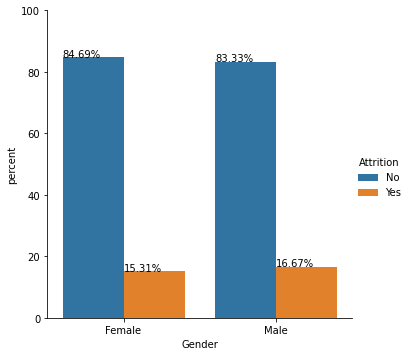

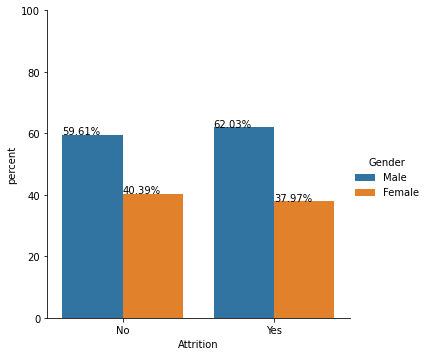

In [48]:
a = employee_data.groupby('Gender')['Attrition'].value_counts(normalize=True)*100
a = a.rename('percent').reset_index()
a

g = sns.catplot(x='Gender',y='percent',hue='Attrition',kind='bar',data=a)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    
plt.show()
    
# Comparasion between gender 
b = employee_data.groupby('Attrition')['Gender'].value_counts(normalize=True)*100
b = b.rename('percent').reset_index()
b

h = sns.catplot(x='Attrition',y='percent',hue='Gender',kind='bar',data=b)
h.ax.set_ylim(0,100)

for p in h.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    h.ax.text(txt_x,txt_y,txt)
    
plt.show()

Female employees who left are 15.31% and male employees who left are 16.67% from total of each gender

If we see from the total employees who leave or stay, male have bigger percentage than female. It's possible since there are more male employees than female employees

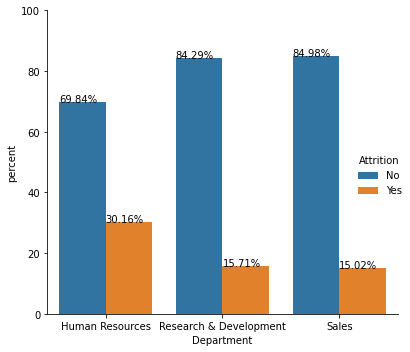

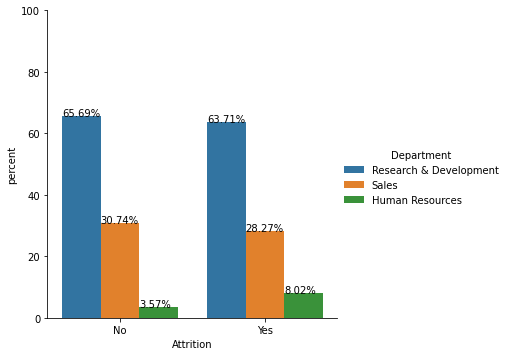

In [49]:
# Comparasion between Deparment 
a = employee_data.groupby('Department')['Attrition'].value_counts(normalize=True)*100
a = a.rename('percent').reset_index()
a

g = sns.catplot(x='Department',y='percent',hue='Attrition',kind='bar',data=a)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    
plt.tight_layout()
plt.show()

# Comparasion between Deparment 
b = employee_data.groupby('Attrition')['Department'].value_counts(normalize=True)*100
b = b.rename('percent').reset_index()
b

h = sns.catplot(x='Attrition',y='percent',hue='Department',kind='bar',data=b)
h.ax.set_ylim(0,100)

for p in h.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    h.ax.text(txt_x,txt_y,txt)

There are 30.16% employees who left from human resources department. It can be an insight to the human resoruces department to retain the employee from leave department or the company. In research & development and sales department, there are 15.71% who decided to leave the company on the previous year.

Even thought human resources department have around 30% employees who left the department or company, from the total employees who decided to leave,employees from research and development department has the biggest percentage which is 63,71%, followed by employees from sales department for 28.77%, and human resources for 8.02%. It also possible because most of employees in the company works at research and development department.

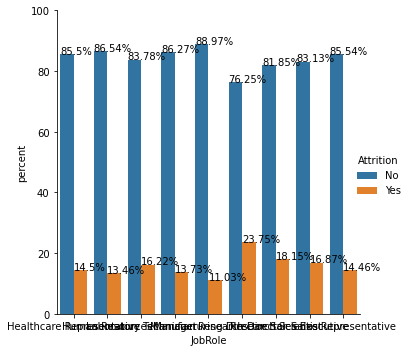

In [50]:
# Comparasion between Deparment 
a = employee_data.groupby('JobRole')['Attrition'].value_counts(normalize=True)*100
a = a.rename('percent').reset_index()
a

g = sns.catplot(x='JobRole',y='percent',hue='Attrition',kind='bar',data=a)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    
plt.tight_layout()
plt.show()

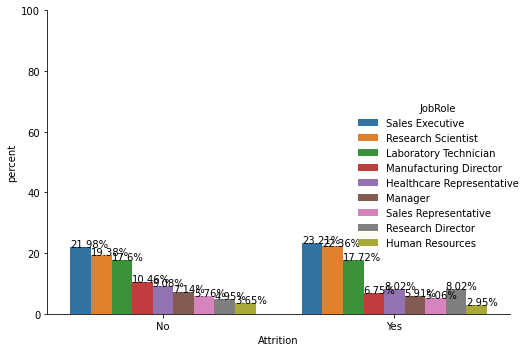

In [51]:
# Comparasion between Deparment 
a = employee_data.groupby('Attrition')['JobRole'].value_counts(normalize=True)*100
a = a.rename('percent').reset_index()
a

g = sns.catplot(x='Attrition',y='percent',hue='JobRole',kind='bar',data=a)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    
plt.tight_layout()
plt.show()

Around 50% employees who left the company on the previous year have job role as sales executive 23,21%, research scientist 22,36%, and laboratory technician 17,72%

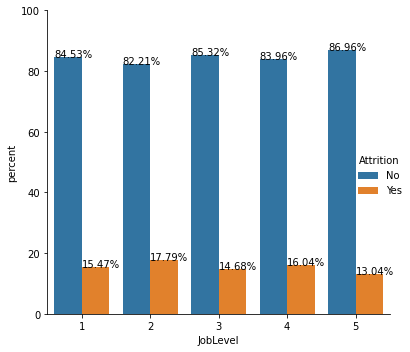

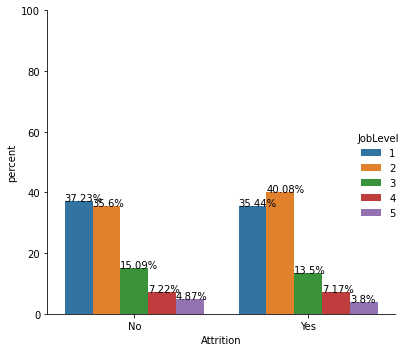

In [52]:
# Comparasion between Deparment 
a = employee_data.groupby('JobLevel')['Attrition'].value_counts(normalize=True)*100
a = a.rename('percent').reset_index()
a

g = sns.catplot(x='JobLevel',y='percent',hue='Attrition',kind='bar',data=a)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    
plt.tight_layout()
plt.show()

# Comparasion between Deparment 
b = employee_data.groupby('Attrition')['JobLevel'].value_counts(normalize=True)*100
b = b.rename('percent').reset_index()
b

h = sns.catplot(x='Attrition',y='percent',hue='JobLevel',kind='bar',data=b)
h.ax.set_ylim(0,100)

for p in h.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    h.ax.text(txt_x,txt_y,txt)
    
plt.tight_layout()
plt.show()

From each job level, more than 80% employees decided to stay and around 15% employees at every job level left the company 

Employees who left the company mostly came from job level two with 40.08%, and job level one with 35.44%.
We can conclude over 50% employees who left the company were from job level 1 and job level 2.

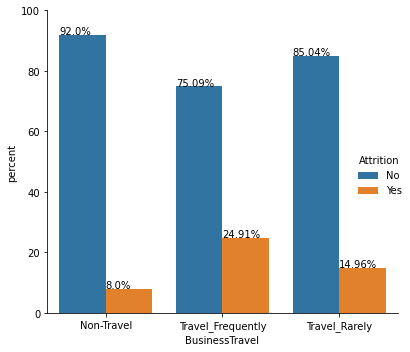

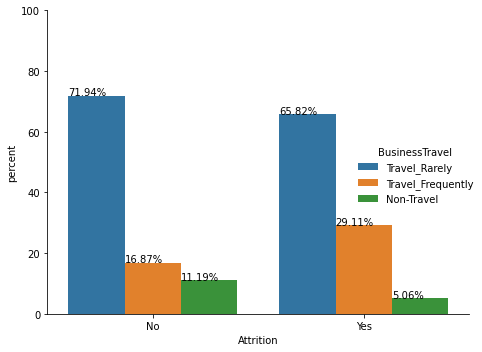

In [53]:
# Comparasion between Deparment 
a = employee_data.groupby('BusinessTravel')['Attrition'].value_counts(normalize=True)*100
a = a.rename('percent').reset_index()
a

g = sns.catplot(x='BusinessTravel',y='percent',hue='Attrition',kind='bar',data=a)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    
plt.tight_layout()
plt.show()

# Comparasion between Deparment 
b = employee_data.groupby('Attrition')['BusinessTravel'].value_counts(normalize=True)*100
b = b.rename('percent').reset_index()
b

h = sns.catplot(x='Attrition',y='percent',hue='BusinessTravel',kind='bar',data=b)
h.ax.set_ylim(0,100)

for p in h.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    h.ax.text(txt_x,txt_y,txt)
    
plt.tight_layout()
plt.show()

From the total employee who have business travel frequently, 24.91% employees left the company.
About 14.96% employee from total employee who rarely have business travel left the company.
Only 8.0% employee who left the company from total employee who never have business trip.
It can be an advice to the company to pay more attention to the employees who often have business trip

Even thought employee who have business trip frequently tend to quit from the company, majority of employees who left are rarely have business travel. 

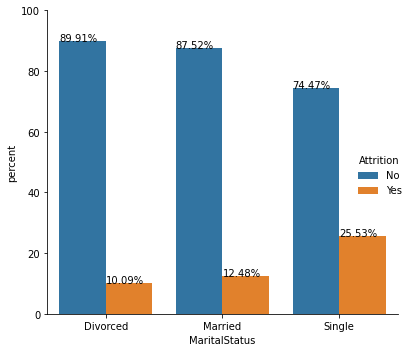

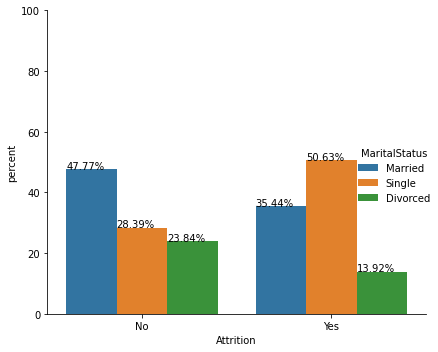

In [54]:
# Comparasion between Deparment 
a = employee_data.groupby('MaritalStatus')['Attrition'].value_counts(normalize=True)*100
a = a.rename('percent').reset_index()
a

g = sns.catplot(x='MaritalStatus',y='percent',hue='Attrition',kind='bar',data=a)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    
plt.tight_layout()
plt.show()

# Comparasion between Deparment 
b = employee_data.groupby('Attrition')['MaritalStatus'].value_counts(normalize=True)*100
b = b.rename('percent').reset_index()
b

h = sns.catplot(x='Attrition',y='percent',hue='MaritalStatus',kind='bar',data=b)
h.ax.set_ylim(0,100)

for p in h.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    h.ax.text(txt_x,txt_y,txt)
    
plt.tight_layout()
plt.show()

There are 25.53% employees left the company from total employees who are still or choose to be single.
12.48% employees left from married employees group and 10.09% left the company from divorced employees.

If we look to the total employees left the company, half of them are single employees which is 50.63%.
In the second place, employees who already married left the company with 35.44%, and last are divorced employees with 13.92%



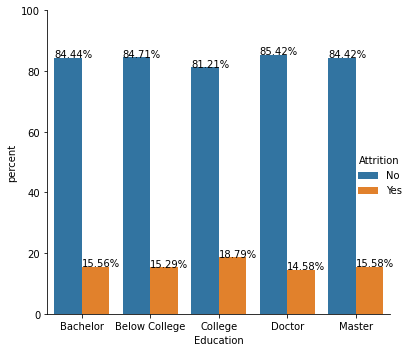

In [55]:
# Comparasion between Deparment 
a = employee_data.groupby('Education')['Attrition'].value_counts(normalize=True)*100
a = a.rename('percent').reset_index()
a

g = sns.catplot(x='Education',y='percent',hue='Attrition',kind='bar',data=a)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    
plt.tight_layout()
plt.show()

- Employees with bachelor degree who left the company on the previous year is 15.56%, cons 84.44% from who stay
- Employees with below college degree who left the company on the previous year is 15.29%, cons 84.71% from who stay
- Employees with college degree who left the company on the previous year is 18.79%, cons 81.21% from who stay
- Employees with doctor degree who left the company on the previous year is 14.58%, cons 85.42% from who stay
- Employees with master degree who left the company on the previous year is 15.58%, cons 85.42% from who stay

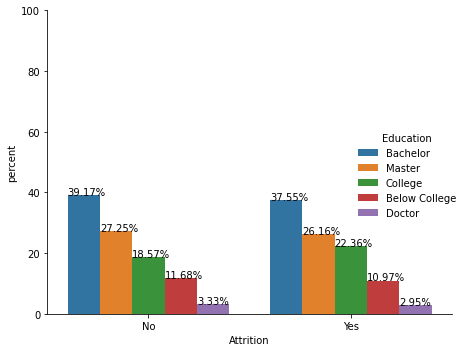

In [56]:
# Comparasion between Deparment 
a = employee_data.groupby('Attrition')['Education'].value_counts(normalize=True)*100
a = a.rename('percent').reset_index()
a

g = sns.catplot(x='Attrition',y='percent',hue='Education',kind='bar',data=a)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    
plt.tight_layout()
plt.show()

From the total employee who left the company on the previous year, bachelor degree with the highest percentage with 37.55%, master degree with 26.15%, college degree with 22.36%, below college with 10.97%, and doctor with 2.95%.
With 37.55% on bachelor degree 26.16% on master degree, it such a loss for the company to have higher education and potential employees.

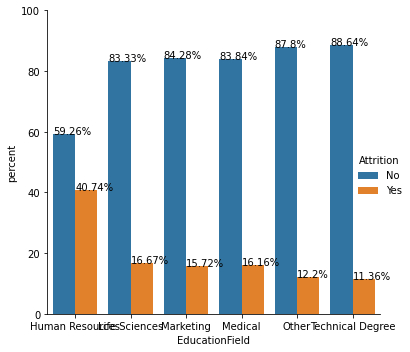

In [57]:
# Comparasion between Deparment 
a = employee_data.groupby('EducationField')['Attrition'].value_counts(normalize=True)*100
a = a.rename('percent').reset_index()
a

g = sns.catplot(x='EducationField',y='percent',hue='Attrition',kind='bar',data=a)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    
plt.tight_layout()
plt.show()

- From each education field, 40.74% employees in human resources field left the company, 59.26% stay.
- 16.67% employees in Life sciense field left the company, 83.33% stay.
- 15.72% employees in Marketing field left the company, 84.28% stay.
- 16.16% employees in medical field left the company, 83.84% stay.
- 12.2% employees in other degree left tge company, 87.8% stay.
- 11.36% employees in other degree left tge company, 88.64% stay.

If employees from human resources field are mostly in human resources department, it's in line with high percentage with human resource department which have high percentage of employees left. We can say there is a problem with human resources department that we can continue to investigate in order to reduce the attrition level of its department


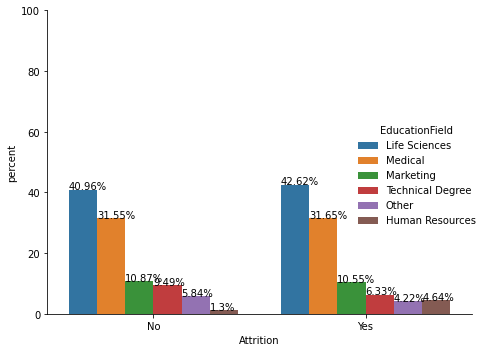

In [58]:
# Comparasion between Deparment 
a = employee_data.groupby('Attrition')['EducationField'].value_counts(normalize=True)*100
a = a.rename('percent').reset_index()
a

g = sns.catplot(x='Attrition',y='percent',hue='EducationField',kind='bar',data=a)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    
plt.tight_layout()
plt.show()

even so, from total employees who left the company, employee who are in life sciences field become the majority. It's possible since employees in life science education field are majority in the company

In [59]:
employee_data.select_dtypes(exclude=['object'])

Age  DistanceFromHome  EmployeeCount  EmployeeID  JobLevel  \
0      51                 6              1           1         1   
1      31                10              1           2         1   
2      32                17              1           3         4   
3      38                 2              1           4         3   
4      32                10              1           5         1   
...   ...               ...            ...         ...       ...   
4405   42                 5              1        4406         1   
4406   29                 2              1        4407         1   
4407   25                25              1        4408         2   
4408   42                18              1        4409         1   
4409   40                28              1        4410         2   

      MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  StandardHours  \
0            131160                 1.0                 11              8   
1             41890                 0.0                 23              8   
2            193280                 1.0                 15              8   
3             83210                 3.0                 11              8   
4             23420                 4.0                 12              8   
...             ...                 ...                ...            ...   
4405          60290                 3.0                 17              8   
4406          26790                 2.0                 15              8   
4407          37020                 0.0                 20              8   
4408          23980                 0.0                 14              8   
4409          54680                 0.0                 12              8   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                1.0                      6   
1                    1                6.0                      3   
2                    3                5.0                      2   
3                    3               13.0                      5   
4                    2                9.0                      2   
...                ...                ...                    ...   
4405                 1               10.0                      5   
4406                 0               10.0                      2   
4407                 0                5.0                      4   
4408                 1               10.0                      2   
4409                 0                NaN                      6   

      YearsAtCompany  YearsSinceLastPromotion  YearsWithCurrManager  \
0                  1                        0                     0   
1                  5                        1                     4   
2                  5                        0                     3   
3                  8                        7                     5   
4                  6                        0                     4   
...              ...                      ...                   ...   
4405               3                        0                     2   
4406               3                        0                     2   
4407               4                        1                     2   
4408               9                        7                     8   
4409              21                        3                     9   

      JobInvolvement  PerformanceRating  EnvironmentSatisfaction  \
0                  3                  3                      3.0   
1                  2                  4                      3.0   
2                  3                  3                      2.0   
3                  2                  3                      4.0   
4                  3                  3                      4.0   
...              ...                ...                      ...   
4405               3                  3                      4.0   
4406               2                  3           

In [60]:
employee_data.head()

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

       Education EducationField  EmployeeCount  EmployeeID  Gender  JobLevel  \
0        College  Life Sciences              1           1  Female         1   
1  Below College  Life Sciences              1           2  Female         1   
2         Master          Other              1           3    Male         4   
3         Doctor  Life Sciences              1           4    Male         3   
4  Below College        Medical              1           5    Male         1   

                     JobRole MaritalStatus  MonthlyIncome  NumCompaniesWorked  \
0  Healthcare Representative       Married         131160                 1.0   
1         Research Scientist        Single          41890                 0.0   
2            Sales Executive       Married         193280                 1.0   
3            Human Resources       Married          83210                 3.0   
4            Sales Executive        Single          23420                 4.0   

  Over18  PercentSalaryHike  StandardHours  StockOptionLevel  \
0      Y                 11              8                 0   
1      Y                 23              8                 1   
2      Y                 15              8                 3   
3      Y                 11              8                 3   
4      Y                 12              8                 2   

   TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0                1.0                      6               1   
1                6.0                      3               5   
2                5.0                      2               5   
3               13.0                      5               8   
4                9.0                      2               6   

   YearsSinceLastPromotion  YearsWithCurrManager  JobInvolvement  \
0                        0                     0               3   
1                        1                     4               2   
2                        0                     3               3   
3                        7                     5               2   
4                        0                     4               3   

   PerformanceRating  EnvironmentSatisfaction  JobSatisfaction  \
0                  3                      3.0              4.0   
1                  4                      3.0              2.0   
2                  3                      2.0              2.0   
3                  3                      4.0              4.0   
4                  3                      4.0              1.0   

   WorkLifeBalance  
0              2.0  
1              4.0  
2              1.0  
3              3.0  
4              3.0

<AxesSubplot:xlabel='Age'>

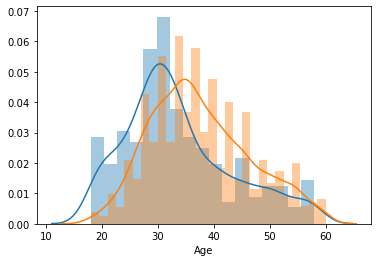

In [61]:
att_yes = employee_data[employee_data['Attrition']=='Yes']
att_yes = att_yes.select_dtypes(exclude=['object'])
att_no = employee_data[employee_data['Attrition']=='No']
att_no = att_no.select_dtypes(exclude=['object'])                       
sns.distplot(att_yes.Age, norm_hist=True,)
sns.distplot(att_no.Age, norm_hist=True)



From the age distribution, there are not so much different between employees who left and stay. Employees who choose to leave are below 35%, and employee who stay are above 35% base on mean.

In [198]:
print("Mean age of Employee who left", att_yes.Age.mean())
print("Mean age of Employee who stay", att_no.Age.mean())

Mean age of Employee who left 33.607594936708864
Mean age of Employee who stay 37.561232765612324


<AxesSubplot:xlabel='MonthlyIncome'>

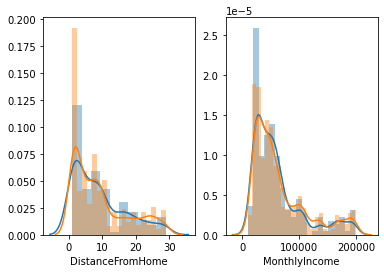

In [62]:
f, axes = plt.subplots(1, 2)

sns.distplot(att_yes.DistanceFromHome, norm_hist=True, ax=axes[0])
sns.distplot(att_no.DistanceFromHome, norm_hist=True, ax=axes[0])

sns.distplot(att_yes.MonthlyIncome, norm_hist=True, ax=axes[1])
sns.distplot(att_no.MonthlyIncome, norm_hist=True, ax=axes[1])

<AxesSubplot:xlabel='PercentSalaryHike'>

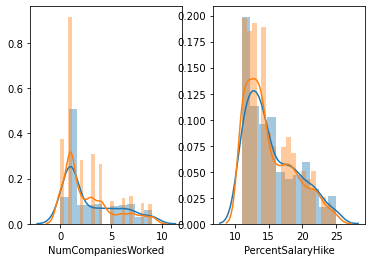

In [63]:
f, axes = plt.subplots(1, 2)

sns.distplot(att_yes.NumCompaniesWorked, norm_hist=True, ax=axes[0])
sns.distplot(att_no.NumCompaniesWorked, norm_hist=True, ax=axes[0])

sns.distplot(att_yes.PercentSalaryHike, norm_hist=True, ax=axes[1])
sns.distplot(att_no.PercentSalaryHike, norm_hist=True, ax=axes[1])

<AxesSubplot:xlabel='TotalWorkingYears'>

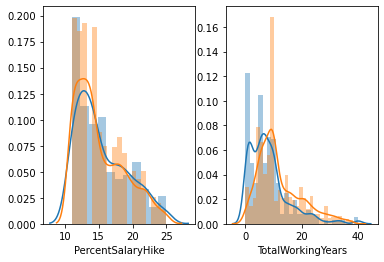

In [64]:
f, axes = plt.subplots(1, 2)

sns.distplot(att_yes.PercentSalaryHike, norm_hist=True, ax=axes[0])
sns.distplot(att_no.PercentSalaryHike, norm_hist=True, ax=axes[0])

sns.distplot(att_yes.TotalWorkingYears, norm_hist=True, ax=axes[1])
sns.distplot(att_no.TotalWorkingYears, norm_hist=True, ax=axes[1])

In [65]:
employee_data.head()

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

       Education EducationField  EmployeeCount  EmployeeID  Gender  JobLevel  \
0        College  Life Sciences              1           1  Female         1   
1  Below College  Life Sciences              1           2  Female         1   
2         Master          Other              1           3    Male         4   
3         Doctor  Life Sciences              1           4    Male         3   
4  Below College        Medical              1           5    Male         1   

                     JobRole MaritalStatus  MonthlyIncome  NumCompaniesWorked  \
0  Healthcare Representative       Married         131160                 1.0   
1         Research Scientist        Single          41890                 0.0   
2            Sales Executive       Married         193280                 1.0   
3            Human Resources       Married          83210                 3.0   
4            Sales Executive        Single          23420                 4.0   

  Over18  PercentSalaryHike  StandardHours  StockOptionLevel  \
0      Y                 11              8                 0   
1      Y                 23              8                 1   
2      Y                 15              8                 3   
3      Y                 11              8                 3   
4      Y                 12              8                 2   

   TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0                1.0                      6               1   
1                6.0                      3               5   
2                5.0                      2               5   
3               13.0                      5               8   
4                9.0                      2               6   

   YearsSinceLastPromotion  YearsWithCurrManager  JobInvolvement  \
0                        0                     0               3   
1                        1                     4               2   
2                        0                     3               3   
3                        7                     5               2   
4                        0                     4               3   

   PerformanceRating  EnvironmentSatisfaction  JobSatisfaction  \
0                  3                      3.0              4.0   
1                  4                      3.0              2.0   
2                  3                      2.0              2.0   
3                  3                      4.0              4.0   
4                  3                      4.0              1.0   

   WorkLifeBalance  
0              2.0  
1              4.0  
2              1.0  
3              3.0  
4              3.0

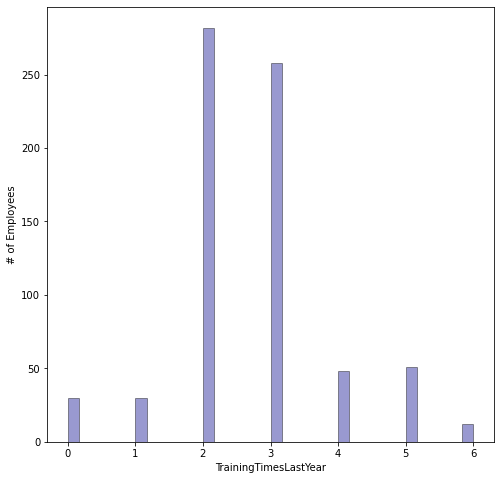

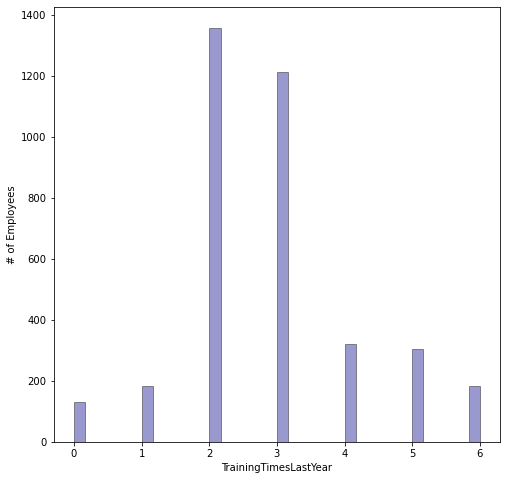

In [202]:
plt.figure(figsize=(8,8))
ax = sns.distplot(att_yes['TrainingTimesLastYear'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Employees')
ax.set_xlabel('TrainingTimesLastYear');
plt.figure(figsize=(8,8))
ax = sns.distplot(att_no['TrainingTimesLastYear'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Employees')
ax.set_xlabel('TrainingTimesLastYear');

Employees who left and who stay mostly have 2 or 3 training times last year

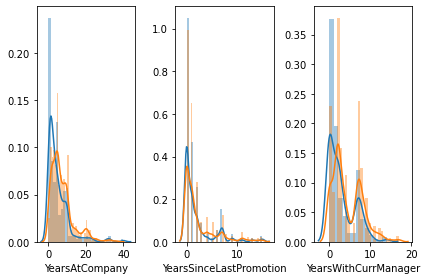

In [67]:
f, axes = plt.subplots(1, 3)

sns.distplot(att_yes.YearsAtCompany, norm_hist=True, ax = axes[0])
sns.distplot(att_no.YearsAtCompany, norm_hist=True, ax = axes[0])



sns.distplot(att_yes.YearsSinceLastPromotion, norm_hist=True, ax = axes[1])
sns.distplot(att_no.YearsSinceLastPromotion, norm_hist=True, ax = axes[1])



sns.distplot(att_yes.YearsWithCurrManager, norm_hist=True, ax = axes[2])
sns.distplot(att_no.YearsWithCurrManager, norm_hist=True, ax = axes[2])

plt.tight_layout()
plt.show()

In [68]:
att_yes

Age  DistanceFromHome  EmployeeCount  EmployeeID  JobLevel  \
1      31                10              1           2         1   
6      28                11              1           7         2   
13     47                 1              1          14         1   
28     44                 1              1          29         2   
30     26                 4              1          31         3   
...   ...               ...            ...         ...       ...   
4381   29                 7              1        4382         1   
4386   33                11              1        4387         1   
4388   33                 1              1        4389         2   
4391   32                23              1        4392         3   
4402   37                 2              1        4403         1   

      MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  StandardHours  \
1             41890                 0.0                 23              8   
6             58130                 2.0                 20              8   
13            57620                 1.0                 11              8   
28           103330                 3.0                 14              8   
30            68540                 2.0                 11              8   
...             ...                 ...                ...            ...   
4381          21800                 1.0                 21              8   
4386          71400                 5.0                 21              8   
4388          51470                 7.0                 11              8   
4391          24680                 0.0                 11              8   
4402          40010                 6.0                 11              8   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1                    1                6.0                      3   
6                    1                5.0                      2   
13                   2               10.0                      4   
28                   1               19.0                      2   
30                   0                5.0                      5   
...                ...                ...                    ...   
4381                 0                4.0                      2   
4386                 0                8.0                      2   
4388                 0               13.0                      2   
4391                 0                4.0                      2   
4402                 1               17.0                      2   

      YearsAtCompany  YearsSinceLastPromotion  YearsWithCurrManager  \
1                  5                        1                     4   
6                  0                        0                     0   
13                10                        9                     9   
28                 1                        0                     0   
30                 3                        0                     2   
...              ...                      ...                   ...   
4381               4                        0                     1   
4386               5                        0                     4   
4388               9                        1                     7   
4391               3                        1                     2   
4402               1                        0                     0   

      JobInvolvement  PerformanceRating  EnvironmentSatisfaction  \
1                  2                  4                      3.0   
6                  3                  4                      1.0   
13                 2                  3                      1.0   
28                 2                  3                      4.0   
30                 2                  3                      1.0   
...              ...                ...                      ...   
4381               3                  4                      3.0   
4386               2                  4           

In [69]:
employee_data['JobInvolvement'].unique()

array([3, 2, 1, 4], dtype=int64)

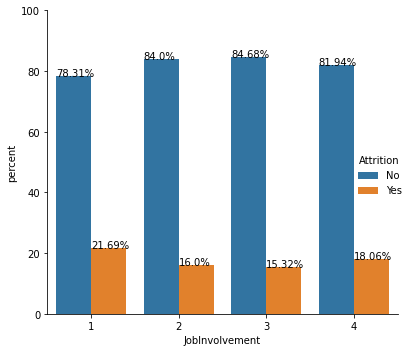

In [71]:
# Comparasion between Deparment 
a = employee_data.groupby('JobInvolvement')['Attrition'].value_counts(normalize=True)*100
a = a.rename('percent').reset_index()
a 

g = sns.catplot(x='JobInvolvement',y='percent',hue='Attrition',kind='bar',data=a)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    
plt.tight_layout()
plt.show()

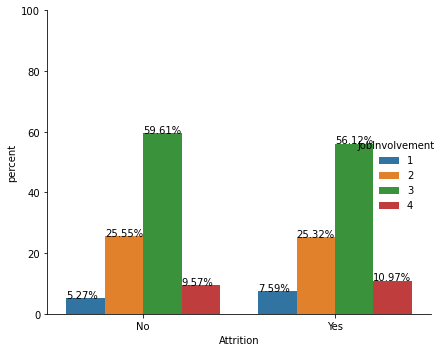

In [72]:
# Comparasion between Deparment 
a = employee_data.groupby('Attrition')['JobInvolvement'].value_counts(normalize=True)*100
a = a.rename('percent').reset_index()
a 

g = sns.catplot(x='Attrition',y='percent',hue='JobInvolvement',kind='bar',data=a)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    
plt.tight_layout()
plt.show()

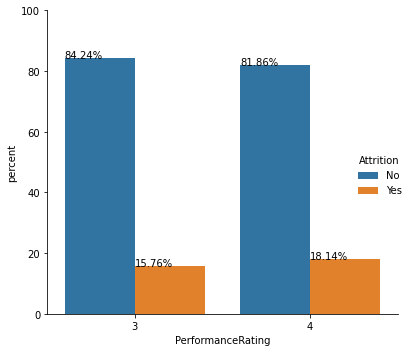

In [73]:
# Comparasion between Deparment 
a = employee_data.groupby('PerformanceRating')['Attrition'].value_counts(normalize=True)*100
a = a.rename('percent').reset_index()
a 

g = sns.catplot(x='PerformanceRating',y='percent',hue='Attrition',kind='bar',data=a)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    
plt.tight_layout()
plt.show()

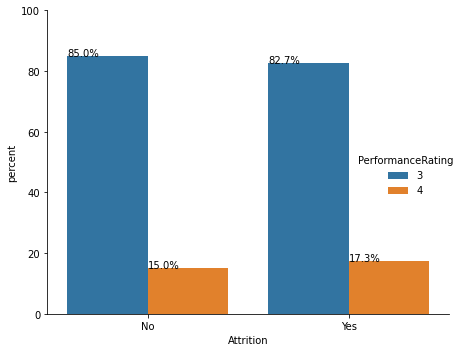

In [74]:
# Comparasion between Deparment 
a = employee_data.groupby('Attrition')['PerformanceRating'].value_counts(normalize=True)*100
a = a.rename('percent').reset_index()
a

g = sns.catplot(x='Attrition',y='percent',hue='PerformanceRating',kind='bar',data=a)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    
plt.tight_layout()
plt.show()

In [75]:
description_data

Variable  \
0                        Age   
1                  Attrition   
2             BusinessTravel   
3                 Department   
4           DistanceFromHome   
5                  Education   
6                        NaN   
7                        NaN   
8                        NaN   
9                        NaN   
10            EducationField   
11             EmployeeCount   
12            EmployeeNumber   
13   EnvironmentSatisfaction   
14                       NaN   
15                       NaN   
16                       NaN   
17                    Gender   
18            JobInvolvement   
19                       NaN   
20                       NaN   
21                       NaN   
22                  JobLevel   
23                   JobRole   
24           JobSatisfaction   
25                       NaN   
26                       NaN   
27                       NaN   
28             MaritalStatus   
29             MonthlyIncome   
30        NumCompaniesWorked   
31                    Over18   
32         PercentSalaryHike   
33         PerformanceRating   
34                       NaN   
35                       NaN   
36                       NaN   
37  RelationshipSatisfaction   
38                       NaN   
39                       NaN   
40                       NaN   
41             StandardHours   
42          StockOptionLevel   
43         TotalWorkingYears   
44     TrainingTimesLastYear   
45           WorkLifeBalance   
46                       NaN   
47                       NaN   
48                       NaN   
49            YearsAtCompany   
50   YearsSinceLastPromotion   
51      YearsWithCurrManager   

                                              Meaning             Levels  
0                                 Age of the employee                NaN  
1   Whether the employee left in the previous year...                NaN  
2   How frequently the employees travelled for bus...                NaN  
3                               Department in company                NaN  
4                           Distance from home in kms                NaN  
5                                     Education Level  1 'Below College'  
6                                                 NaN        2 'College'  
7                                                 NaN       3 'Bachelor'  
8                                                 NaN         4 'Master'  
9                                                 NaN         5 'Doctor'  
10                                 Field of education                NaN  
11                                     Employee count                NaN  
12                                 Employee number/id                NaN  
13                Work Environment Satisfaction Level            1 'Low'  
14                                                NaN         2 'Medium'  
15                                                NaN           3 'High'  
16                                                NaN      4 'Very High'  
17                                 Gender of employee                NaN  
18                              Job Involvement Level            1 'Low'  
19                                                NaN         2 'Medium'  
20                                                NaN           3 'High'  
21                                                NaN      4 'Very High'  
22          Job level at company on a scale of 1 to 5                NaN  
23                        Name of job role in company                NaN  
24                             Job Satisfaction Level            1 'Low'  
25                                                NaN         2 'Medium'  
26                                                NaN           3 'High'  
27                                                NaN      4 'Very High'  
28                     Marital status of the employee                NaN  
29                 Monthly income in rupees per month                NaN 

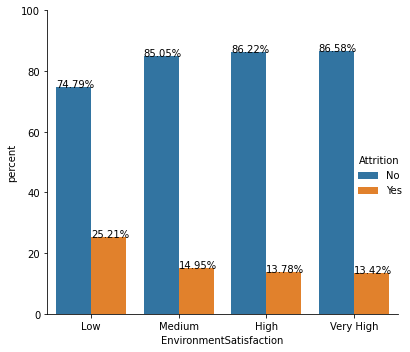

In [76]:
# Comparasion between Deparment 
a = employee_data.groupby('EnvironmentSatisfaction')['Attrition'].value_counts(normalize=True)*100
a = a.rename('percent').reset_index()
a = a.replace({1:'Low', 2:'Medium', 3:'High', 4:'Very High'})
a

g = sns.catplot(x='EnvironmentSatisfaction',y='percent',hue='Attrition',kind='bar',data=a)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    
plt.tight_layout()
plt.show()

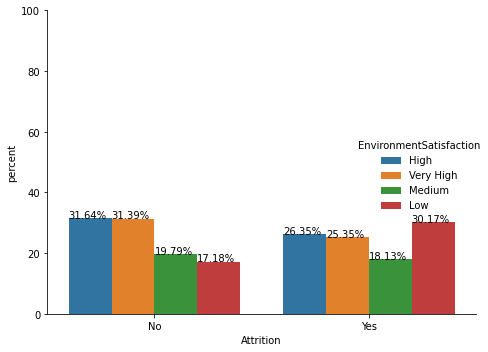

In [77]:
# Comparasion between Deparment 
a = employee_data.groupby('Attrition')['EnvironmentSatisfaction'].value_counts(normalize=True)*100
a = a.rename('percent').reset_index()
a = a.replace({1:'Low', 2:'Medium', 3:'High', 4:'Very High'})
a

g = sns.catplot(x='Attrition',y='percent',hue='EnvironmentSatisfaction',kind='bar',data=a)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    
plt.tight_layout()
plt.show()

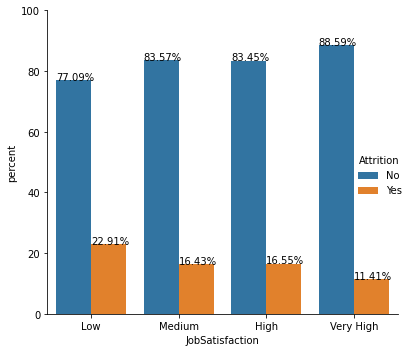

In [78]:
# Comparasion between Deparment 
a = employee_data.groupby('JobSatisfaction')['Attrition'].value_counts(normalize=True)*100
a = a.rename('percent').reset_index()
a = a.replace({1:'Low', 2:'Medium', 3:'High', 4:'Very High'})
a

g = sns.catplot(x='JobSatisfaction',y='percent',hue='Attrition',kind='bar',data=a)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    
plt.tight_layout()
plt.show()

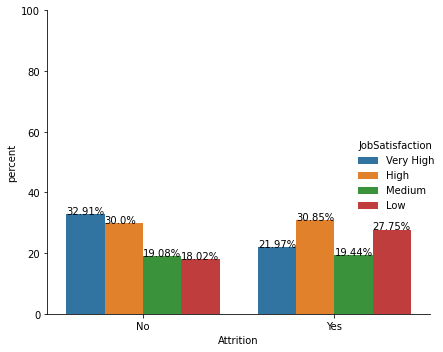

In [79]:
# Comparasion between Deparment 
a = employee_data.groupby('Attrition')['JobSatisfaction'].value_counts(normalize=True)*100
a = a.rename('percent').reset_index()
a = a.replace({1:'Low', 2:'Medium', 3:'High', 4:'Very High'})
a

g = sns.catplot(x='Attrition',y='percent',hue='JobSatisfaction',kind='bar',data=a)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    
plt.tight_layout()
plt.show()

In [80]:
employee_data.head()

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

       Education EducationField  EmployeeCount  EmployeeID  Gender  JobLevel  \
0        College  Life Sciences              1           1  Female         1   
1  Below College  Life Sciences              1           2  Female         1   
2         Master          Other              1           3    Male         4   
3         Doctor  Life Sciences              1           4    Male         3   
4  Below College        Medical              1           5    Male         1   

                     JobRole MaritalStatus  MonthlyIncome  NumCompaniesWorked  \
0  Healthcare Representative       Married         131160                 1.0   
1         Research Scientist        Single          41890                 0.0   
2            Sales Executive       Married         193280                 1.0   
3            Human Resources       Married          83210                 3.0   
4            Sales Executive        Single          23420                 4.0   

  Over18  PercentSalaryHike  StandardHours  StockOptionLevel  \
0      Y                 11              8                 0   
1      Y                 23              8                 1   
2      Y                 15              8                 3   
3      Y                 11              8                 3   
4      Y                 12              8                 2   

   TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0                1.0                      6               1   
1                6.0                      3               5   
2                5.0                      2               5   
3               13.0                      5               8   
4                9.0                      2               6   

   YearsSinceLastPromotion  YearsWithCurrManager  JobInvolvement  \
0                        0                     0               3   
1                        1                     4               2   
2                        0                     3               3   
3                        7                     5               2   
4                        0                     4               3   

   PerformanceRating  EnvironmentSatisfaction  JobSatisfaction  \
0                  3                      3.0              4.0   
1                  4                      3.0              2.0   
2                  3                      2.0              2.0   
3                  3                      4.0              4.0   
4                  3                      4.0              1.0   

   WorkLifeBalance  
0              2.0  
1              4.0  
2              1.0  
3              3.0  
4              3.0

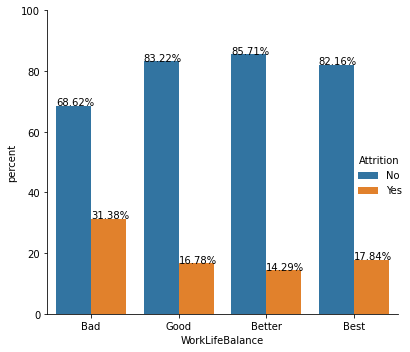

In [81]:
# Comparasion between Deparment 
a = employee_data.groupby('WorkLifeBalance')['Attrition'].value_counts(normalize=True)*100
a = a.rename('percent').reset_index()
a = a.replace({1:'Bad', 2:'Good', 3:'Better', 4:'Best'})
a

g = sns.catplot(x='WorkLifeBalance',y='percent',hue='Attrition',kind='bar',data=a)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    
plt.tight_layout()
plt.show()

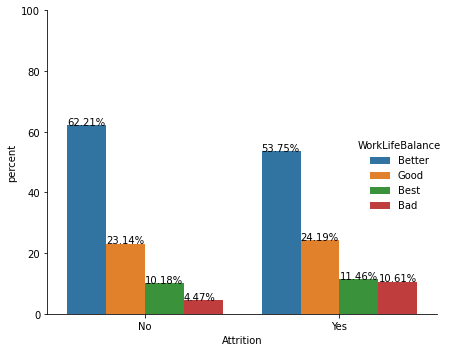

In [82]:
# Comparasion between Deparment 
a = employee_data.groupby('Attrition')['WorkLifeBalance'].value_counts(normalize=True)*100
a = a.rename('percent').reset_index()
a = a.replace({1:'Bad', 2:'Good', 3:'Better', 4:'Best'})
a

g = sns.catplot(x='Attrition',y='percent',hue='WorkLifeBalance',kind='bar',data=a)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    
plt.tight_layout()
plt.show()

From the total employees who left the company, majority feel have better worklife balance in the company with 53.57%.

But, if wee see people who feel have bad work life balance tend to quit from the company as from the total who feel bad, there are 31.38% who left and 68.62% who stay. Employee who feel better are 14.29% left the company, and 85.71% stay at the company

Bad work life balance can lead to greater burnout and stress. Employee may find another job with better work life balance so they leave the company.

# CONCLUSION FROM EDA

-  What happened in Human resources department need to be investigated since it's divison have high percentage of attrition 
- Single employee tend to leave the company than married and divorce. 
- Employee with frequently business travel tend have a bigger chance to leave the company. Since business travel needed by the company for their business, company can give better benefit to them, such as better flight,bonus pay, hotel
- From the age distribution, employee who decide to leave the company have age with mean 33%. For younger employees, company can focus on their development with better challenge opportunities, involvement in work, training to enhance their skill, succession planning so they have a clear career path.
- The evaluation from the employee for the company in job involvement, job satisfaction, environment satisfaction, and work life balance showed us bad evaluation tend to make them quit. Actually All the variable relate with theory of motivation (some people know with Marslow motivation theory, Herzberg Hygiene and Motivators theory)

As the best exmaple, i will use Marslow Theory.




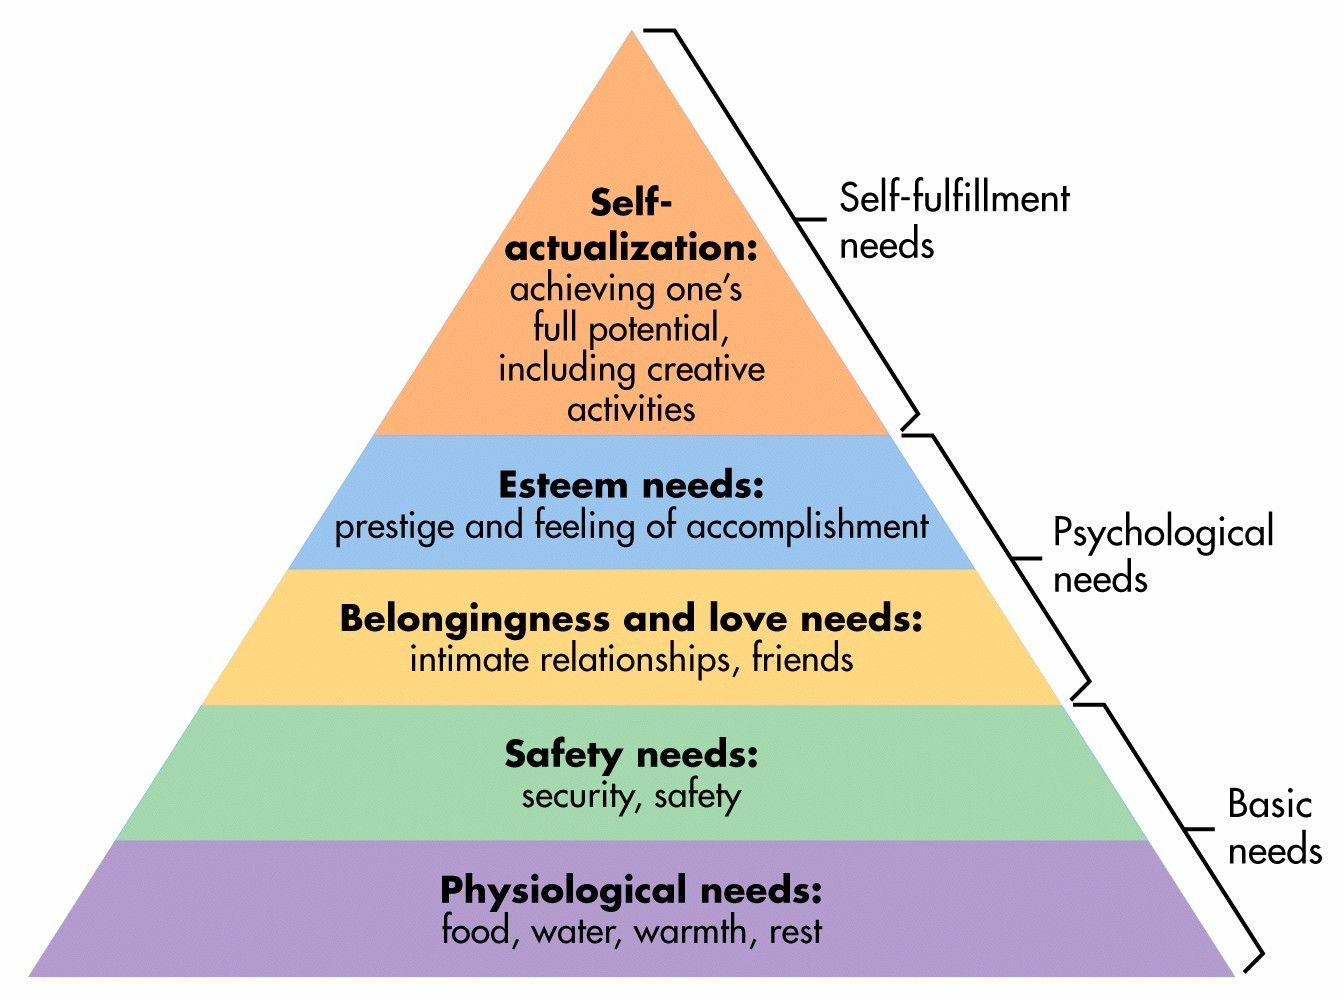

Company need to pay attention to the basic needs which is salary for their live. Are the salary enough? is the salary 
in accordance with the job, the level of job? How i stheir job security?. After the basic needs, company should aware with their environment, such as relationship with their collegue, are they really engage with their job and their company?. Then, Company have to let their employee to full fill their self actualization with recognizion, challenge, decrease the insecurity to make a mistake so they can give their best performance and reach their potential.

## FEATURE ENGINEERING

In [ ]:
Before we go

In [83]:
employee_data

Age Attrition     BusinessTravel              Department  \
0      51        No      Travel_Rarely                   Sales   
1      31       Yes  Travel_Frequently  Research & Development   
2      32        No  Travel_Frequently  Research & Development   
3      38        No         Non-Travel  Research & Development   
4      32        No      Travel_Rarely  Research & Development   
...   ...       ...                ...                     ...   
4405   42        No      Travel_Rarely  Research & Development   
4406   29        No      Travel_Rarely  Research & Development   
4407   25        No      Travel_Rarely  Research & Development   
4408   42        No      Travel_Rarely                   Sales   
4409   40        No      Travel_Rarely  Research & Development   

      DistanceFromHome      Education EducationField  EmployeeCount  \
0                    6        College  Life Sciences              1   
1                   10  Below College  Life Sciences              1   
2                   17         Master          Other              1   
3                    2         Doctor  Life Sciences              1   
4                   10  Below College        Medical              1   
...                ...            ...            ...            ...   
4405                 5         Master        Medical              1   
4406                 2         Master        Medical              1   
4407                25        College  Life Sciences              1   
4408                18        College        Medical              1   
4409                28       Bachelor        Medical              1   

      EmployeeID  Gender  JobLevel                    JobRole MaritalStatus  \
0              1  Female         1  Healthcare Representative       Married   
1              2  Female         1         Research Scientist        Single   
2              3    Male         4            Sales Executive       Married   
3              4    Male         3            Human Resources       Married   
4              5    Male         1            Sales Executive        Single   
...          ...     ...       ...                        ...           ...   
4405        4406  Female         1         Research Scientist        Single   
4406        4407    Male         1      Laboratory Technician      Divorced   
4407        4408    Male         2            Sales Executive       Married   
4408        4409    Male         1      Laboratory Technician      Divorced   
4409        4410    Male         2      Laboratory Technician      Divorced   

      MonthlyIncome  NumCompaniesWorked Over18  PercentSalaryHike  \
0            131160                 1.0      Y                 11   
1             41890                 0.0      Y                 23   
2            193280                 1.0      Y                 15   
3             83210                 3.0      Y                 11   
4             23420                 4.0      Y                 12   
...             ...                 ...    ...                ...   
4405          60290                 3.0      Y                 17   
4406          26790                 2.0      Y                 15   
4407          37020                 0.0      Y                 20   
4408          23980                 0.0      Y                 14   
4409          54680                 0.0      Y                 12   

      StandardHours  StockOptionLevel  TotalWorkingYears  \
0                 8                 0                1.0   
1                 8                 1                6.0   
2                 8                 3                5.0   
3                 8                 3               13.0   
4                 8                 2                9.0   
...             ...               ...                ...   
4405              8                 1               10.0   
4406              8                 0               10.0   
4407              8                 0     

In [84]:
a

Attrition WorkLifeBalance    percent
0        No          Better  62.210095
1        No            Good  23.137790
2        No            Best  10.177353
3        No             Bad   4.474761
4       Yes          Better  53.748232
5       Yes            Good  24.186704
6       Yes            Best  11.456860
7       Yes             Bad  10.608204

In [85]:
employee_data[['EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance']].mean()

EnvironmentSatisfaction    2.723603
JobSatisfaction            2.728246
WorkLifeBalance            2.761436
dtype: float64

Checking the mean of company evaluation from the employees with all variables have mean of 2.7 or round to 3

Feature Engineering

Filling missing value.

In [86]:
# col = ['JobInvolvement','EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance','PerformanceRating']

# for i in col:
#     if i == "WorkLifeBalance":
#         employee_data[i] =  employee_data[i].replace({1:'Bad', 2:'Good', 3:'Better', 4:'Best'})
#     elif i == "PerformanceRating":
#         employee_data[i] = employee_data[i].replace({1:'Low', 2:'Good', 3:'Excellent', 4:'Outstanding'})
#     else:
#         employee_data[i] = employee_data[i].replace({1:'Low', 2:'Medium', 3:'High', 4:'Very High'})


In [87]:
employee_data

Age Attrition     BusinessTravel              Department  \
0      51        No      Travel_Rarely                   Sales   
1      31       Yes  Travel_Frequently  Research & Development   
2      32        No  Travel_Frequently  Research & Development   
3      38        No         Non-Travel  Research & Development   
4      32        No      Travel_Rarely  Research & Development   
...   ...       ...                ...                     ...   
4405   42        No      Travel_Rarely  Research & Development   
4406   29        No      Travel_Rarely  Research & Development   
4407   25        No      Travel_Rarely  Research & Development   
4408   42        No      Travel_Rarely                   Sales   
4409   40        No      Travel_Rarely  Research & Development   

      DistanceFromHome      Education EducationField  EmployeeCount  \
0                    6        College  Life Sciences              1   
1                   10  Below College  Life Sciences              1   
2                   17         Master          Other              1   
3                    2         Doctor  Life Sciences              1   
4                   10  Below College        Medical              1   
...                ...            ...            ...            ...   
4405                 5         Master        Medical              1   
4406                 2         Master        Medical              1   
4407                25        College  Life Sciences              1   
4408                18        College        Medical              1   
4409                28       Bachelor        Medical              1   

      EmployeeID  Gender  JobLevel                    JobRole MaritalStatus  \
0              1  Female         1  Healthcare Representative       Married   
1              2  Female         1         Research Scientist        Single   
2              3    Male         4            Sales Executive       Married   
3              4    Male         3            Human Resources       Married   
4              5    Male         1            Sales Executive        Single   
...          ...     ...       ...                        ...           ...   
4405        4406  Female         1         Research Scientist        Single   
4406        4407    Male         1      Laboratory Technician      Divorced   
4407        4408    Male         2            Sales Executive       Married   
4408        4409    Male         1      Laboratory Technician      Divorced   
4409        4410    Male         2      Laboratory Technician      Divorced   

      MonthlyIncome  NumCompaniesWorked Over18  PercentSalaryHike  \
0            131160                 1.0      Y                 11   
1             41890                 0.0      Y                 23   
2            193280                 1.0      Y                 15   
3             83210                 3.0      Y                 11   
4             23420                 4.0      Y                 12   
...             ...                 ...    ...                ...   
4405          60290                 3.0      Y                 17   
4406          26790                 2.0      Y                 15   
4407          37020                 0.0      Y                 20   
4408          23980                 0.0      Y                 14   
4409          54680                 0.0      Y                 12   

      StandardHours  StockOptionLevel  TotalWorkingYears  \
0                 8                 0                1.0   
1                 8                 1                6.0   
2                 8                 3                5.0   
3                 8                 3               13.0   
4                 8                 2                9.0   
...             ...               ...                ...   
4405              8                 1               10.0   
4406              8                 0               10.0   
4407              8                 0     

In [91]:
#data without missing value
data_with_mv = employee_data.copy()
data_without_mv = employee_data.copy()

In [92]:
percent_missing_value = employee_data.isna().sum() / len(employee_data) *100
mv_percentage = pd.DataFrame({'columns name': employee_data.keys(), 'percentage': percent_missing_value })
mv_percentage = mv_percentage[mv_percentage['percentage']> 0]
mv_percentage

columns name  percentage
NumCompaniesWorked            NumCompaniesWorked    0.430839
TotalWorkingYears              TotalWorkingYears    0.204082
EnvironmentSatisfaction  EnvironmentSatisfaction    0.566893
JobSatisfaction                  JobSatisfaction    0.453515
WorkLifeBalance                  WorkLifeBalance    0.861678

There are some missing value at some variables.
- NumCompaniesWorked contribute around 0.43% missing value to the data
- TotalWorkingYears contribute around 0.20% missing value to the data
- Environment Satisfaction contribute around 0.56% missing value to the data
- Job Satisfaction contribute around 0.45% missing value to the data
- Work life balance contribute around 0.45% missing value to the data

Since those are small number of missing value, we don't have to drop any columns.
We can fill it with mean of each variable

In [93]:
data_without_mv = data_with_mv.fillna(data_with_mv.mean())

In [94]:
data_without_mv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   object 
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [95]:
data_without_mv['EnvironmentSatisfaction'] = data_without_mv['EnvironmentSatisfaction'].fillna(3)
data_without_mv['JobSatisfaction'] = data_without_mv['JobSatisfaction'].fillna(3)
data_without_mv['WorkLifeBalance'] = data_without_mv['WorkLifeBalance'].fillna(3)



Because the mean of variables are around ~3, we fill all nan values with 3

In [96]:
data_without_mv

Age Attrition     BusinessTravel              Department  \
0      51        No      Travel_Rarely                   Sales   
1      31       Yes  Travel_Frequently  Research & Development   
2      32        No  Travel_Frequently  Research & Development   
3      38        No         Non-Travel  Research & Development   
4      32        No      Travel_Rarely  Research & Development   
...   ...       ...                ...                     ...   
4405   42        No      Travel_Rarely  Research & Development   
4406   29        No      Travel_Rarely  Research & Development   
4407   25        No      Travel_Rarely  Research & Development   
4408   42        No      Travel_Rarely                   Sales   
4409   40        No      Travel_Rarely  Research & Development   

      DistanceFromHome      Education EducationField  EmployeeCount  \
0                    6        College  Life Sciences              1   
1                   10  Below College  Life Sciences              1   
2                   17         Master          Other              1   
3                    2         Doctor  Life Sciences              1   
4                   10  Below College        Medical              1   
...                ...            ...            ...            ...   
4405                 5         Master        Medical              1   
4406                 2         Master        Medical              1   
4407                25        College  Life Sciences              1   
4408                18        College        Medical              1   
4409                28       Bachelor        Medical              1   

      EmployeeID  Gender  JobLevel                    JobRole MaritalStatus  \
0              1  Female         1  Healthcare Representative       Married   
1              2  Female         1         Research Scientist        Single   
2              3    Male         4            Sales Executive       Married   
3              4    Male         3            Human Resources       Married   
4              5    Male         1            Sales Executive        Single   
...          ...     ...       ...                        ...           ...   
4405        4406  Female         1         Research Scientist        Single   
4406        4407    Male         1      Laboratory Technician      Divorced   
4407        4408    Male         2            Sales Executive       Married   
4408        4409    Male         1      Laboratory Technician      Divorced   
4409        4410    Male         2      Laboratory Technician      Divorced   

      MonthlyIncome  NumCompaniesWorked Over18  PercentSalaryHike  \
0            131160                 1.0      Y                 11   
1             41890                 0.0      Y                 23   
2            193280                 1.0      Y                 15   
3             83210                 3.0      Y                 11   
4             23420                 4.0      Y                 12   
...             ...                 ...    ...                ...   
4405          60290                 3.0      Y                 17   
4406          26790                 2.0      Y                 15   
4407          37020                 0.0      Y                 20   
4408          23980                 0.0      Y                 14   
4409          54680                 0.0      Y                 12   

      StandardHours  StockOptionLevel  TotalWorkingYears  \
0                 8                 0           1.000000   
1                 8                 1           6.000000   
2                 8                 3           5.000000   
3                 8                 3          13.000000   
4                 8                 2           9.000000   
...             ...               ...                ...   
4405              8                 1          10.000000   
4406              8                 0          10.000000   
4407              8                 0     

In [97]:
x_without_mv = data_without_mv.drop(columns=['EmployeeCount','EmployeeID','Over18','StandardHours','Attrition'])

In [284]:
categorical_columns = data_without_mv.drop(columns=['EmployeeCount','EmployeeID','Over18','StandardHours','Attrition','JobInvolvement','PerformanceRating','EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance'])
categorical_columns = categorical_columns.select_dtypes('object')
categorical_columns


BusinessTravel              Department      Education EducationField  \
0         Travel_Rarely                   Sales        College  Life Sciences   
1     Travel_Frequently  Research & Development  Below College  Life Sciences   
2     Travel_Frequently  Research & Development         Master          Other   
3            Non-Travel  Research & Development         Doctor  Life Sciences   
4         Travel_Rarely  Research & Development  Below College        Medical   
...                 ...                     ...            ...            ...   
4405      Travel_Rarely  Research & Development         Master        Medical   
4406      Travel_Rarely  Research & Development         Master        Medical   
4407      Travel_Rarely  Research & Development        College  Life Sciences   
4408      Travel_Rarely                   Sales        College        Medical   
4409      Travel_Rarely  Research & Development       Bachelor        Medical   

      Gender                    JobRole MaritalStatus  
0     Female  Healthcare Representative       Married  
1     Female         Research Scientist        Single  
2       Male            Sales Executive       Married  
3       Male            Human Resources       Married  
4       Male            Sales Executive        Single  
...      ...                        ...           ...  
4405  Female         Research Scientist        Single  
4406    Male      Laboratory Technician      Divorced  
4407    Male            Sales Executive       Married  
4408    Male      Laboratory Technician      Divorced  
4409    Male      Laboratory Technician      Divorced  

[4410 rows x 7 columns]

In [204]:
categorical_columns['Education'].unique()

array(['Bachelor', 'College', 'Master', 'Below College', 'Doctor'],
      dtype=object)

In [285]:
x_without_mv = data_without_mv.drop(columns=['EmployeeCount','EmployeeID','Over18','StandardHours','Attrition'])

Dropping features we are not going to use. Some features are dropped because only have one value and unique value

In [286]:
x_without_mv = pd.get_dummies(x_without_mv, columns=categorical_columns.keys(), drop_first=True)



In [225]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   object 
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [232]:
x_without_mv['PerformanceRating'].max()

4

In [102]:
# mapping label into number
y_without_mv = data_without_mv['Attrition'].map({'Yes':1, 'No':0})

# Modelling

### We are going to use Logistic Regression, Random Forest Classification, and GradientBoost

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

In [104]:
def modelling(x,y):
    
    x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=101)

    logmodel = LogisticRegression(random_state=101)
    logmodel.fit(x_train, y_train)


    rfc = RandomForestClassifier(random_state=101)
    rfc.fit(x_train, y_train)

    GB = GradientBoostingClassifier(random_state=101)
    GB.fit(x_train, y_train)
    
    print('Logistic Regression Train Report')
    print(classification_report(y_train, logmodel.predict(x_train)))
    print('=======================================================================================')
    print('Random Forest Classification Train Report')
    print(classification_report(y_train, rfc.predict(x_train)))
    print('=======================================================================================')
    print('Gradient Boosting Train Report')
    print(classification_report(y_train, GB.predict(x_train)))
    
    print('============================================================')
    print('============================================================')
    
    print('Logistic Regression Test Report')
    print(classification_report(y_test, logmodel.predict(x_test)))
    print('=======================================================================================')
    print('Random Forest Classification Test Report')
    print(classification_report(y_test, rfc.predict(x_test)))
    print('=======================================================================================')
    print('Gradient Boosting Test Report')
    print(classification_report(y_test, GB.predict(x_test)))





In [105]:
modelling(x_without_mv, y_without_mv )

Logistic Regression Train Report
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2783
           1       0.71      0.02      0.04       524

    accuracy                           0.84      3307
   macro avg       0.78      0.51      0.48      3307
weighted avg       0.82      0.84      0.78      3307

Random Forest Classification Train Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2783
           1       1.00      1.00      1.00       524

    accuracy                           1.00      3307
   macro avg       1.00      1.00      1.00      3307
weighted avg       1.00      1.00      1.00      3307

Gradient Boosting Train Report
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2783
           1       0.96      0.45      0.62       524

    accuracy                           0.91      3307
   macro avg       0.9

From the result of the modelling with default parameter above,
We can see logistic regression have good accuration but not in recall.
Since we want to determine if an employee will left the company better , we need to increase the recall score. 

Random Forest Classification have good prediction with train 100% for all report, and good in predicting test data

Gradient Boost have good accuracy but have small recall score.
Since we want to determine if an employee will left the company better , we need to increase the recall score. 


- The target of the data set actually have imbalance data. We should handling imbalance data by some method. We are trying to see if we use undersampling method and class weight method,
I actually prefer to use class weight than have to erase some data.

In [106]:
employee_data['Attrition'].value_counts()

No     3699
Yes     711
Name: Attrition, dtype: int64

##### Undersampling

In [107]:
## setting minority data & majority data

min_data = data_without_mv[data_without_mv['Attrition'] == 'Yes'] 
maj_data = data_without_mv[data_without_mv['Attrition'] == 'No']


In [108]:
## take index on majority data = data minority
np.random.seed(101)
index_majority = np.random.choice(maj_data.index, len(min_data))

In [109]:
len(index_majority)

711

In [110]:
index_majority

array([1036, 1840, 1618, 1904,  721, 2442,   86, 4133, 1164, 1873, 1993,
       3126, 1124, 2823,  881, 2070, 3804, 3676, 1090,  577, 2496,   56,
       2246,  751, 1822, 2612,  441, 2334, 3502, 2519, 1717, 1882, 1517,
       2770, 1983, 3764, 1959,  403, 3519, 2574, 1817, 4212, 2731, 1533,
       4346, 1170, 3790, 4007,  995, 3057, 1088,  524, 1743, 4397, 4022,
       3330, 4063, 4184, 1699, 4264, 1607, 3173, 3537, 4028,  620,  428,
       1387, 2768,  912, 2686, 1207, 1768, 2262, 2021, 3242, 3514, 3998,
       3031,  501, 3083, 3682,  605, 2367, 1954, 1547, 3552, 2250, 2891,
       2175, 1813,   54, 3581, 3320, 2698, 1384, 1219, 2046, 4125, 1699,
       1897,  281, 2559, 1089, 3041,  470, 4408, 1787, 2942,  649,    4,
       1020, 2847, 1577, 4294, 1518, 3284, 3038, 2678,  762, 1136, 2757,
       1347, 2719, 4103, 2533,  422, 1512, 2033, 3913, 2713,  547, 2242,
       3584, 1766,   53, 1990, 1884, 3042, 2412, 2433,  954, 4226, 3846,
        450, 2472,  562, 3076, 3948, 1522, 4121, 13

In [111]:
majority_data_new = data_without_mv.loc[index_majority]

In [112]:
under_sampling_data = pd.concat([majority_data_new, min_data])

In [113]:
under_sampling_data

Age Attrition     BusinessTravel              Department  \
1036   41        No      Travel_Rarely  Research & Development   
1840   37        No      Travel_Rarely                   Sales   
1618   52        No      Travel_Rarely  Research & Development   
1904   32        No      Travel_Rarely  Research & Development   
721    34        No      Travel_Rarely  Research & Development   
...   ...       ...                ...                     ...   
4381   29       Yes      Travel_Rarely  Research & Development   
4386   33       Yes      Travel_Rarely                   Sales   
4388   33       Yes      Travel_Rarely                   Sales   
4391   32       Yes      Travel_Rarely                   Sales   
4402   37       Yes  Travel_Frequently                   Sales   

      DistanceFromHome      Education EducationField  EmployeeCount  \
1036                 3       Bachelor  Life Sciences              1   
1840                24        College  Life Sciences              1   
1618                26        College  Life Sciences              1   
1904                24       Bachelor  Life Sciences              1   
721                  5       Bachelor  Life Sciences              1   
...                ...            ...            ...            ...   
4381                 7  Below College  Life Sciences              1   
4386                11         Master      Marketing              1   
4388                 1       Bachelor  Life Sciences              1   
4391                23  Below College  Life Sciences              1   
4402                 2       Bachelor      Marketing              1   

      EmployeeID  Gender  JobLevel                    JobRole MaritalStatus  \
1036        1037    Male         3         Research Scientist        Single   
1840        1841  Female         4      Laboratory Technician      Divorced   
1618        1619  Female         2       Sales Representative       Married   
1904        1905    Male         4      Laboratory Technician       Married   
721          722    Male         1         Research Scientist       Married   
...          ...     ...       ...                        ...           ...   
4381        4382  Female         1         Research Scientist        Single   
4386        4387    Male         1         Research Scientist       Married   
4388        4389    Male         2                    Manager       Married   
4391        4392    Male         3  Healthcare Representative        Single   
4402        4403    Male         1      Laboratory Technician      Divorced   

      MonthlyIncome  NumCompaniesWorked Over18  PercentSalaryHike  \
1036          35970                 3.0      Y                 13   
1840          42570                 4.0      Y                 15   
1618          33750                 2.0      Y                 21   
1904          37300                 1.0      Y                 25   
721           45530                 4.0      Y                 18   
...             ...                 ...    ...                ...   
4381          21800                 1.0      Y                 21   
4386          71400                 5.0      Y                 21   
4388          51470                 7.0      Y                 11   
4391          24680                 0.0      Y                 11   
4402          40010                 6.0      Y                 11   

      StandardHours  StockOptionLevel  TotalWorkingYears  \
1036              8                 1               11.0   
1840              8                 0                9.0   
1618              8                 0               28.0   
1904              8                 1                8.0   
721               8                 1               10.0   
...             ...               ...                ...   
4381              8                 0                4.0   
4386              8                 0                8.0   
4388              8                 0     

In [114]:
categorical_columns = under_sampling_data.select_dtypes('object')

In [115]:
x_und = under_sampling_data.drop(columns=['EmployeeCount','EmployeeID','Over18','StandardHours','Attrition'])
x_und = pd.get_dummies(under_sampling_data, columns=categorical_columns.keys(), drop_first=True)
y_und = under_sampling_data['Attrition']

In [116]:
def modelling(x,y):
    
    x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=101)

    logmodel = LogisticRegression(random_state=101)
    logmodel.fit(x_train, y_train)


    rfc = RandomForestClassifier(random_state=101)
    rfc.fit(x_train, y_train)

    GB = GradientBoostingClassifier(random_state=101)
    GB.fit(x_train, y_train)

    print('Logistic Regression Train Report')
    print(classification_report(y_train, logmodel.predict(x_train)))
    print('=======================================================================================')
    print('Random Forest Classification Train Report')
    print(classification_report(y_train, rfc.predict(x_train)))
    print('=======================================================================================')
    print('Gradient Boosting Train Report')
    print(classification_report(y_train, GB.predict(x_train)))
    
    print('============================================================')
    print('============================================================')
    
    print('Logistic Regression Test Report')
    print(classification_report(y_test, logmodel.predict(x_test)))
    print('=======================================================================================')
    print('Random Forest Classification Test Report')
    print(classification_report(y_test, rfc.predict(x_test)))
    print('=======================================================================================')
    print('Gradient Boosting Test Report')
    print(classification_report(y_test, GB.predict(x_test)))


In [117]:
modelling(x_und, y_und)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Logistic Regression Train Report
              precision    recall  f1-score   support

          No       0.77      0.72      0.74       531
         Yes       0.74      0.79      0.76       535

    accuracy                           0.75      1066
   macro avg       0.75      0.75      0.75      1066
weighted avg       0.75      0.75      0.75      1066

Random Forest Classification Train Report
              precision    recall  f1-score   support

          No       1.00      1.00      1.00       531
         Yes       1.00      1.00      1.00       535

    accuracy                           1.00      1066
   macro avg       1.00      1.00      1.00      1066
weighted avg       1.00      1.00      1.00      1066

Gradient Boosting Train Report
              precision    recall  f1-score   support

          No       1.00      1.00      1.00       531
         Yes       1.00      1.00      1.00       535

    accuracy                           1.00      1066
   macro avg       1.0

Handling imbalance data with undersampling makes some model better on recall and accuration. But, with undersampling data means we reduce datas.
We need take a look for another method and see if we can also have better result

# CLASS WEIGHT

In [118]:
class_weight = {0:1, 1:10}

In [119]:
def modelling(x,y):
    
    x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=101)

    logmodel = LogisticRegression(random_state=101, class_weight=class_weight)
    logmodel.fit(x_train, y_train)


    rfc = RandomForestClassifier(random_state=101, class_weight=class_weight )
    rfc.fit(x_train, y_train)

    GB = GradientBoostingClassifier(random_state=101, max_depth= 8)
    GB.fit(x_train, y_train)

    print('Logistic Regression Train Report')
    print(classification_report(y_train, logmodel.predict(x_train)))
    print('=======================================================================================')
    print('Random Forest Classification Train Report')
    print(classification_report(y_train, rfc.predict(x_train)))
    print('=======================================================================================')
    print('Gradient Boosting Train Report')
    print(classification_report(y_train, GB.predict(x_train)))
    
    print('============================================================')
    print('============================================================')
    
    print('Logistic Regression Test Report')
    print(classification_report(y_test, logmodel.predict(x_test)))
    print('=======================================================================================')
    print('Random Forest Classification Test Report')
    print(classification_report(y_test, rfc.predict(x_test)))
    print('=======================================================================================')
    print('Gradient Boosting Test Report')
    print(classification_report(y_test, GB.predict(x_test)))


In [120]:
modelling( x_without_mv , y_without_mv)

Logistic Regression Train Report
              precision    recall  f1-score   support

           0       0.92      0.17      0.29      2783
           1       0.17      0.92      0.29       524

    accuracy                           0.29      3307
   macro avg       0.55      0.55      0.29      3307
weighted avg       0.80      0.29      0.29      3307

Random Forest Classification Train Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2783
           1       1.00      1.00      1.00       524

    accuracy                           1.00      3307
   macro avg       1.00      1.00      1.00      3307
weighted avg       1.00      1.00      1.00      3307

Gradient Boosting Train Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2783
           1       1.00      1.00      1.00       524

    accuracy                           1.00      3307
   macro avg       1.0

Class weight is a method to handle imbalance data without decreasing the data.

In here, we add class_weight to logistic and random forest clasiffication parameter with 0:1 and 1:12.
Since Gradient Boosting doesn't class weight in its parameter, we increase max depth for its parameter by 5 

As the result, we find increasing recall score on logistic regression test report with 0.91.
Random Forest and Gradient boosting still make better result in recall than Logigstic regression. Gradient Boosting have 1% ahead in recall score than Random Forest Classifier

## HYPERPARAMETER TUNING

Let's do some hyperparameter tuning with GridSearchCV to get best parameters. We run the model with best parameters for each model. Then, we compare between the model and use with best result

### With GridSearchCV

In [121]:
logisitc_param = { 'C' : (0.1, 0.01, 0.001 ,0.0001, 1, 10, 100, 1000) }

In [122]:
from sklearn.model_selection import GridSearchCV

#### Hypermeter tuning Logistic Regression

In [123]:

def log_hypertune(x,y):
    x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=101)
    
    logreg = LogisticRegression()
    model_grid = GridSearchCV(logreg, logisitc_param, scoring='recall', cv=5, n_jobs=-1)
    model_grid.fit(x_train, y_train)
    
    
    pred_test = model_grid.predict(x_test)
    
    return model_grid.best_params_
    

In [124]:
log_hypertune(x_without_mv, y_without_mv)

{'C': 0.1}

In logistic regression, we need to add parameter C: 0.1 to get the best parameter

### Logistic Regression With Best Parameter

In [168]:
def modelling(x,y):
    
    x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=101)

    logmodel = LogisticRegression(random_state=101, class_weight=class_weight, C=1)
    logmodel.fit(x_train, y_train)
    
    print('Logistic Regression Train Report')
    print(classification_report(y_train, logmodel.predict(x_train)))
    print('=======================================================================================')
    
    print('Logistic Regression Test Report')
    print(classification_report(y_test, logmodel.predict(x_test)))
    print('=======================================================================================')
    
    y_pred = logmodel.predict(x)
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(y_train, logmodel.predict(x_train)))
    print(confusion_matrix(y_test, logmodel.predict(x_test)))
    
    from sklearn import metrics
    metrics.plot_roc_curve(logmodel, x_train, y_train)  # doctest: +SKIP
    plt.show()
    
    metrics.plot_roc_curve(logmodel, x_test, y_test)  # doctest: +SKIP
    plt.show()



Logistic Regression Train Report
              precision    recall  f1-score   support

           0       0.92      0.17      0.29      2783
           1       0.17      0.92      0.29       524

    accuracy                           0.29      3307
   macro avg       0.55      0.55      0.29      3307
weighted avg       0.80      0.29      0.29      3307

Logistic Regression Test Report
              precision    recall  f1-score   support

           0       0.89      0.15      0.25       916
           1       0.18      0.91      0.30       187

    accuracy                           0.28      1103
   macro avg       0.53      0.53      0.28      1103
weighted avg       0.77      0.28      0.26      1103

[[ 473 2310]
 [  40  484]]
[[136 780]
 [ 17 170]]


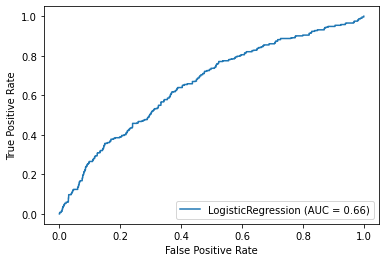

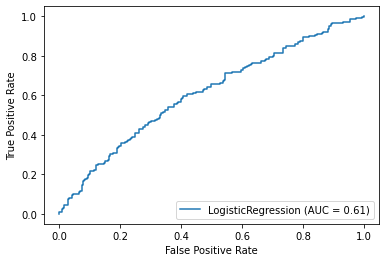

In [169]:
modelling(x_without_mv, y_without_mv)

## Hyperparameter Tuning for Random Forest Classification

In [127]:
rfc_parameters = {
    'max_depth' : [None,4,5,6,7,8,10],
    'min_samples_split' : [2,3,4,6,8,10],
    'min_samples_leaf' : [1,2,3,4,5,6,7,8],
    'class_weight' : [{0:1, 1:x} for x in [2,4,8,10,12]]
}

In [128]:

def rfc_hypertune(x,y):
    x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=101)
    
    rfc = RandomForestClassifier(random_state=101)
    model_grid = GridSearchCV(rfc, rfc_parameters, scoring='recall', cv=5, n_jobs=-1)
    model_grid.fit(x_train, y_train)
    
    
    pred_test = model_grid.predict(x_test)
    
    return model_grid.best_params_
    
    


In [129]:
rfc_hypertune(x_without_mv, y_without_mv)

{'class_weight': {0: 1, 1: 12},
 'max_depth': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 6}

To get best parameters in Random Forest Classification, we need to add :
- class_weight= 0:1, 1:12
- max depth = 4
- min samples leaf = 8
- min samples split = 6

as model parameters

In [130]:
best_param = {'class_weight': {0: 1, 1: 12},
 'max_depth': 4,
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'n_estimators': 100}

In [166]:
def rfc_modelling(x,y):
    
    x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=101)

    rfc = RandomForestClassifier(random_state=101, class_weight = {0:1, 1:12}, max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=100)
    rfc.fit(x_train, y_train)
    
    print('Random Forest Train Report')
    print(classification_report(y_train, rfc.predict(x_train)))
    print('=======================================================================================')

    print('Random Forest Test Report')
    print(classification_report(y_test, rfc.predict(x_test)))
    print('=======================================================================================')
    
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(y_train, rfc.predict(x_train)))
    print(confusion_matrix(y_test, rfc.predict(x_test)))
    
    sns.heatmap(confusion_matrix(y_train, rfc.predict(x_train)), annot=True)
    
    from sklearn import metrics
    metrics.plot_roc_curve(rfc, x_train, y_train)  # doctest: +SKIP
    plt.show()
    
    metrics.plot_roc_curve(rfc, x_test, y_test)  # doctest: +SKIP
    plt.show()


Random Forest Train Report
              precision    recall  f1-score   support

           0       1.00      0.13      0.23      2783
           1       0.18      1.00      0.30       524

    accuracy                           0.27      3307
   macro avg       0.59      0.57      0.27      3307
weighted avg       0.87      0.27      0.24      3307

Random Forest Test Report
              precision    recall  f1-score   support

           0       1.00      0.13      0.23       916
           1       0.19      1.00      0.32       187

    accuracy                           0.28      1103
   macro avg       0.60      0.57      0.28      1103
weighted avg       0.86      0.28      0.25      1103

[[ 362 2421]
 [   0  524]]
[[120 796]
 [  0 187]]


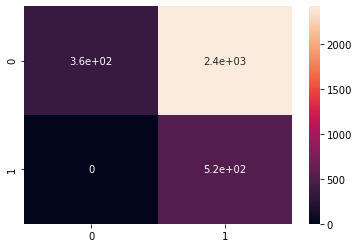

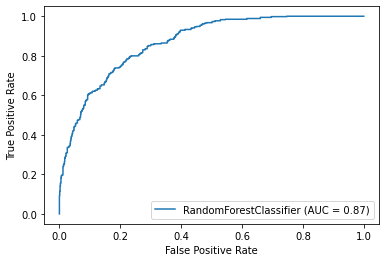

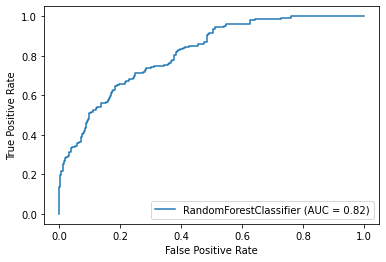

In [167]:
rfc_modelling(x_without_mv,y_without_mv)

#### Hyperparameter Tuning GradientBoosting

In [133]:
gbm_param = { 'learning_rate': [0.1, 0.2, 0.001, 0.0001, 0.3, 0.4],
 'max_depth': [3,4,5,6],
 'min_samples_split': [2,3,4,5,6,7,8]}

In [134]:

def gbm_hypertune(x,y):
    x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=101)
    
    gbm = GradientBoostingClassifier(random_state=101)
    model_grid = GridSearchCV(gbm, gbm_param, scoring='recall', cv=5, n_jobs=-1)
    model_grid.fit(x_train, y_train)
    
    
    pred_test = model_grid.predict(x_test)
    
    return model_grid.best_params_
    
    

In [135]:
gbm_hypertune(x_without_mv, y_without_mv)

{'learning_rate': 0.4, 'max_depth': 5, 'min_samples_split': 5}

To get best result with Gradient Boosting, we need to add:

- learning rate = 0.4
- max depth = 5
- min samples split = 5

as parameters

In [162]:
def gbm_modelling(x,y):
    
    x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=101)

    gbm = GradientBoostingClassifier(random_state=101, learning_rate=0.4, max_depth=5, min_samples_split=5)
    gbm.fit(x_train, y_train)
    
    print('Gradient Boosting Train Report')
    print(classification_report(y_train, gbm.predict(x_train)))
    print('=======================================================================================')
    
    print('Gradient Boosting Test Report')
    print(classification_report(y_test, gbm.predict(x_test)))
    print('=======================================================================================')
    
    y_pred = gbm.predict(x)
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(y_train, gbm.predict(x_train)))
    print(confusion_matrix(y_test, gbm.predict(x_test)))
    
    from sklearn import metrics
    
    metrics.plot_roc_curve(gbm, x_train, y_train)  # doctest: +SKIP
    plt.show()
    
    metrics.plot_roc_curve(gbm, x_test, y_test)  # doctest: +SKIP
    plt.show()


Gradient Boosting Train Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2783
           1       1.00      1.00      1.00       524

    accuracy                           1.00      3307
   macro avg       1.00      1.00      1.00      3307
weighted avg       1.00      1.00      1.00      3307

Gradient Boosting Test Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       916
           1       0.98      0.95      0.96       187

    accuracy                           0.99      1103
   macro avg       0.99      0.97      0.98      1103
weighted avg       0.99      0.99      0.99      1103

[[2783    0]
 [   0  524]]
[[913   3]
 [ 10 177]]


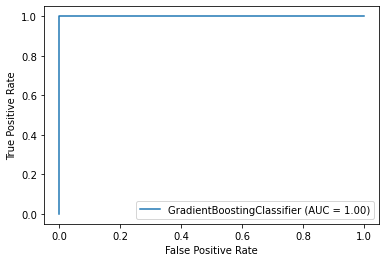

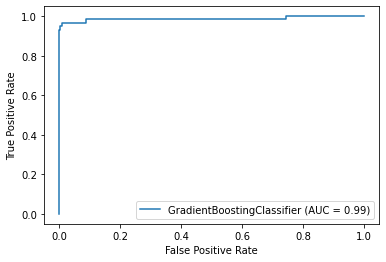

In [163]:
gbm_modelling(x_without_mv, y_without_mv)

# Conclusion

After we did GridSearchCV to finde best parameters from each model, we run the model with the best parameters.

- As the result, logistic regression doesn't have so much differences from before. If we look at the ROC-AUV curve, it only can distinguish between the classification target for only 0.61 or 61%. It's too near to 50% which model can't distinguish any data.

- Random Forest Classifier have better recall score than logistic regression which is 100% and better score on ROC-AUC curve. Model have a chance to distinguish the data for 82%.

- GradientBoosting have better recall score than logistic regression but 5% below Random Forest Classifier. Even so, Gradient Boosting hve the best ROC-AUC score with 99%. It means the model have a chance to distinguish the data for 99%, almost perfect. Model also doesn't have so much error in classifying the data.

in conclusion, the company can use GradientBoosting as the model to classify whether employee will leave or employee will stay.

Since losing talent is a big loss to the company, it's better if it retain its employee, especially high skill and fit-in employee


In [143]:
gbm = GradientBoostingClassifier(random_state=101, learning_rate=0.4, max_depth=5, min_samples_split=5)

In [ ]:
gbm_def = GradientBoostingClassifier()

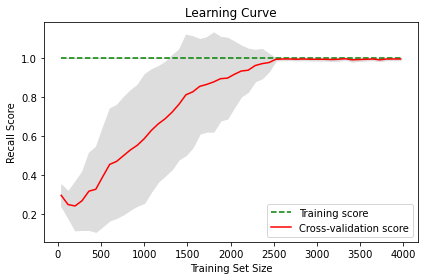

In [144]:
from sklearn.model_selection import learning_curve

#Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(gbm, 
                                                        x_without_mv, 
                                                        y_without_mv,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='recall',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))


# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="green",  label="Training score")
plt.plot(train_sizes, test_mean, color="red", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Recall Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()





In [ ]:
# def attrition_class():

#     from sklearn.model_selection import train_test_split
#     from sklearn.linear_model import LogisticRegression
#     from sklearn.ensemble import RandomForestClassifier
#     from sklearn.ensemble import GradientBoostingClassifier
#     from sklearn.metrics import classification_report
    
#     import pandas as pd
#     import numpy as np
#     import matplotlib.pyplot as plt
#     import seaborn as sns
    
#     pd.set_option('display.max_columns', 500)
    
    
#     data1 = pd.read_csv('general_data.csv')
#     data2 = pd.read_csv('manager_survey_data.csv')
#     data3 = pd.read_csv('employee_survey_data.csv')
    
#     employee_data = pd.merge(data1, data2, on='EmployeeID')
#     employee_data = pd.merge(employee_data, data3, on='EmployeeID')
    
# #     col = ['JobInvolvement','EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance','PerformanceRating']
# #     #change likerscale to category
# #     for i in col:
# #         if i == "WorkLifeBalance":
# #             employee_data[i] =  employee_data[i].replace({1:'Bad', 2:'Good', 3:'Better', 4:'Best'})
# #         elif i == "PerformanceRating":
# #             employee_data[i] = employee_data[i].replace({1:'Low', 2:'Good', 3:'Excellent', 4:'Outstanding'})
# #         else:
# #             employee_data[i] = employee_data[i].replace({1:'Low', 2:'Medium', 3:'High', 4:'Very High'})
            
#     #data without missing value
#     data_without_mv = employee_data.copy()
    
#     data_without_mv['EnvironmentSatisfaction'] = data_without_mv['EnvironmentSatisfaction'].fillna(3)
#     data_without_mv['JobSatisfaction'] = data_without_mv['JobSatisfaction'].fillna(3)
#     data_without_mv['WorkLifeBalance'] = data_without_mv['WorkLifeBalance'].fillna(3)
    
#     categorical_columns = data_without_mv.drop(columns=['EmployeeCount','EmployeeID','Over18','StandardHours','Attrition','JobInvolvement','PerformanceRating','EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance'])
#     categorical_columns = categorical_columns.select_dtypes('object')

    
# #     x_without_mv = data_without_mv.drop(columns=['EmployeeCount','EmployeeID','Over18','StandardHours','Attrition'])
# #     categorical_columns = x_without_mv.select_dtypes('object')
#     x_without_mv = data_without_mv.drop(columns=['EmployeeCount','EmployeeID','Over18','StandardHours','Attrition'])
#     x_without_mv = pd.get_dummies(x_without_mv, columns=categorical_columns.keys(), drop_first=True)
    
#     y_without_mv = data_without_mv['Attrition'].map({'Yes':1, 'No':0})
    
#     x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=101)

#     gbm = GradientBoostingClassifier(random_state=101, learning_rate=0.4, max_depth=5, min_samples_split=5)
    
#     gbm.fit(x_train, y_train)
    
    

In [292]:
x_train,x_test,y_train,y_test = train_test_split(x_without_mv,y_without_mv , random_state=101)
gbm = GradientBoostingClassifier(random_state=101, learning_rate=0.4, max_depth=5, min_samples_split=5)
gbm.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.4, max_depth=5, min_samples_split=5,
                           random_state=101)

### Deploying  with Pickle

In [293]:
import pickle

filename = 'model_attrition.sav'
pickle.dump(gbm, open(filename,'wb'))

filename = 'x_colomn.sav'
pickle.dump(x_without_mv.columns, open(filename , 'wb'))

model = pickle.load(open('model_attrition.sav','rb'))
# real_columns = pickle.load(open('real_colomn.sav','rb'))
one_hot_columns = pickle.load(open('x_colomn.sav','rb'))

In [279]:
model.predict([x_train.loc[1].values])

array([1], dtype=int64)

In [295]:
filename = 'final.sav'
pickle.dump(gbm, open(filename,'wb'))
gbm_new = pickle.load(open('final.sav','rb'))

In [300]:
gbm_new.predict([x_train.loc[1].values])

array([1], dtype=int64)

In [271]:
x_without_mv.to_csv('employeedata.csv', index = False, header=True)

In [277]:
employee_data.loc[773]

Age                                            46
Attrition                                     Yes
BusinessTravel                      Travel_Rarely
Department                 Research & Development
DistanceFromHome                               18
Education                           Below College
EducationField                            Medical
EmployeeCount                                   1
EmployeeID                                    774
Gender                                       Male
JobLevel                                        1
JobRole                    Manufacturing Director
MaritalStatus                            Divorced
MonthlyIncome                               59800
NumCompaniesWorked                              4
Over18                                          Y
PercentSalaryHike                              11
StandardHours                                   8
StockOptionLevel                                1
TotalWorkingYears                              28


Age     BusinessTravel              Department  DistanceFromHome  \
0      51      Travel_Rarely                   Sales                 6   
1      31  Travel_Frequently  Research & Development                10   
2      32  Travel_Frequently  Research & Development                17   
3      38         Non-Travel  Research & Development                 2   
4      32      Travel_Rarely  Research & Development                10   
...   ...                ...                     ...               ...   
4405   42      Travel_Rarely  Research & Development                 5   
4406   29      Travel_Rarely  Research & Development                 2   
4407   25      Travel_Rarely  Research & Development                25   
4408   42      Travel_Rarely                   Sales                18   
4409   40      Travel_Rarely  Research & Development                28   

          Education EducationField  Gender  JobLevel  \
0           College  Life Sciences  Female         1   
1     Below College  Life Sciences  Female         1   
2            Master          Other    Male         4   
3            Doctor  Life Sciences    Male         3   
4     Below College        Medical    Male         1   
...             ...            ...     ...       ...   
4405         Master        Medical  Female         1   
4406         Master        Medical    Male         1   
4407        College  Life Sciences    Male         2   
4408        College        Medical    Male         1   
4409       Bachelor        Medical    Male         2   

                        JobRole MaritalStatus  MonthlyIncome  \
0     Healthcare Representative       Married         131160   
1            Research Scientist        Single          41890   
2               Sales Executive       Married         193280   
3               Human Resources       Married          83210   
4               Sales Executive        Single          23420   
...                         ...           ...            ...   
4405         Research Scientist        Single          60290   
4406      Laboratory Technician      Divorced          26790   
4407            Sales Executive       Married          37020   
4408      Laboratory Technician      Divorced          23980   
4409      Laboratory Technician      Divorced          54680   

      NumCompaniesWorked  PercentSalaryHike  StockOptionLevel  \
0                    1.0                 11                 0   
1                    0.0                 23                 1   
2                    1.0                 15                 3   
3                    3.0                 11                 3   
4                    4.0                 12                 2   
...                  ...                ...               ...   
4405                 3.0                 17                 1   
4406                 2.0                 15                 0   
4407                 0.0                 20                 0   
4408                 0.0                 14                 1   
4409                 0.0                 12                 0   

      TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0              1.000000                      6               1   
1              6.000000                      3               5   
2              5.000000                      2               5   
3             13.000000                      5               8   
4              9.000000                      2               6   
...                 ...                    ...             ...   
4405          10.000000                      5               3   
4406          10.000000                      2               3   
4407           5.000000                      4               4   
4408          10.000000                      2               9   
4409          11.279936                      6              21   

      YearsSinceLastPromotion  YearsWithCurrManager  JobInvolvement  \
0                           0 

In [272]:
x_test

Age  DistanceFromHome  JobLevel  MonthlyIncome  NumCompaniesWorked  \
341    36                 2         2          27200                 4.0   
74     54                 1         2          29330                 3.0   
1554   31                 6         3          81030                 1.0   
2588   38                 3         1          44900                 2.0   
675    28                 1         2          20330                 2.0   
...   ...               ...       ...            ...                 ...   
3608   43                 7         1         195020                 3.0   
2177   25                 6         4          20450                 3.0   
773    46                18         1          59800                 4.0   
1218   59                 2         5          20660                 4.0   
3208   39                12         1          62200                 1.0   

      PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
341                  14                 1                8.0   
74                   12                 2               20.0   
1554                 15                 1               11.0   
2588                 21                 1               10.0   
675                  15                 1                5.0   
...                 ...               ...                ...   
3608                 18                 2               23.0   
2177                 19                 0                7.0   
773                  11                 1               28.0   
1218                 12                 1               12.0   
3208                 14                 2               20.0   

      TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
341                       3               5                        0   
74                        2               4                        0   
1554                      5              11                        4   
2588                      1               5                        0   
675                       5               3                        1   
...                     ...             ...                      ...   
3608                      3              21                       15   
2177                      3               3                        1   
773                       2               7                        4   
1218                      3               1                        0   
3208                      2              20                       11   

      YearsWithCurrManager  JobInvolvement  PerformanceRating  \
341                      4               3                  3   
74                       3               3                  3   
1554                    10               3                  3   
2588                     3               3                  4   
675                      2               3                  3   
...                    ...             ...                ...   
3608                    17               4                  3   
2177                     2               3                  3   
773                      3               3                  3   
1218                     0               3                  3   
3208                    10               3                  3   

      EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  \
341                       3.0              2.0              3.0   
74                        4.0              3.0              2.0   
1554                      3.0              4.0              2.0   
2588                      2.0              4.0              4.0   
675                       4.0              1.0              2.0   
...                       ...              ...              ...   
3608                      4.0              4.0              4.0   
2177                      4.0              4.0              2.0   
773                       1.0              4.0              4.0   
1218    

In [302]:
employee_data.loc[1]

Age                                            31
Attrition                                     Yes
BusinessTravel                  Travel_Frequently
Department                 Research & Development
DistanceFromHome                               10
Education                           Below College
EducationField                      Life Sciences
EmployeeCount                                   1
EmployeeID                                      2
Gender                                     Female
JobLevel                                        1
JobRole                        Research Scientist
MaritalStatus                              Single
MonthlyIncome                               41890
NumCompaniesWorked                              0
Over18                                          Y
PercentSalaryHike                              23
StandardHours                                   8
StockOptionLevel                                1
TotalWorkingYears                               6


In [291]:
model.predict([x_without_mv.loc[1].values])

array([1], dtype=int64)